# Importación de librerías

In [14]:
# Silent warnings
import warnings
warnings.filterwarnings("ignore")

# Core
import numpy as np
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

# Data
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from scipy import stats


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [17]:
# %run "G:\Mi unidad\U_Camp_Google\Ucamp\functions_python_2.py
%run "/Users/juansebastiabramirezayala/Library/CloudStorage/GoogleDrive-juanrayala12@gmail.com/Mi unidad/U_Camp_Google/Ucamp/functions_python_2.py"


<Figure size 640x480 with 0 Axes>

# Descripción de las variables

1. **ID**: Identificación de cada cliente  
2. **LIMIT_BAL**: Monto de crédito otorgado en dólares NT (incluye crédito individual y familiar/suplementario)  
3. **SEX**: Género (1 = masculino, 2 = femenino)  
4. **EDUCATION**: Nivel educativo (1 = posgrado, 2 = universidad, 3 = secundaria, 4 = otros, 5 = desconocido, 6 = desconocido)  
5. **MARRIAGE**: Estado civil (1 = casado, 2 = soltero, 3 = otros)  
6. **AGE**: Edad en años  
7. **Pay0-6**: Historial de pagos anteriores. Se registraron los pagos mensuales pasados. La escala de medición para el estado de reembolso es la siguiente:  -1 = pagó puntualmente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses;  ...  8 = retraso en el pago de ocho meses;  9 = retraso en el pago de nueve meses o más.  
8. **Bill Amount 1-6**: Monto de la factura.
9. **Pay Amount 1-6**: Monto del pago previo.
25. **default.payment.next.month**: Pago predeterminado el mes siguiente (1 = sí, 0 = no) 

# Importación del conjunto de datos

In [3]:
lalonde_df = pd.read_csv('Default_Clientes.csv', sep=";")
lalonde_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
# Dimensiones
lalonde_df.shape

(30000, 25)

# EDA de los datos

## Análisis inicial y estructura de datos

In [5]:
# Información básica
print("="*50)
print("1. ANÁLISIS INICIAL Y ESTRUCTURA")
print("="*50)
print("\nInformación del dataset:")
print(f"Filas: {lalonde_df.shape[0]}, Columnas: {lalonde_df.shape[1]}")
print("\nTipos de datos:")
print(lalonde_df.dtypes)

# Valores únicos por columna
print("\nValores únicos por columna:")
for col in lalonde_df.columns:
    print(f"{col}: {lalonde_df[col].nunique()} valores únicos")

1. ANÁLISIS INICIAL Y ESTRUCTURA

Información del dataset:
Filas: 30000, Columnas: 25

Tipos de datos:
ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object

Valores únicos por columna:
ID: 30000 valores únicos
LIMIT_BAL: 81 valores únicos
SEX: 2 valores únicos
EDUCATION: 7 valores únicos
MARRIAGE: 4 valores únicos
AGE: 56 valores únicos
PAY_0: 11 valores únicos
PAY_2: 11 valores únicos
PAY_3: 11 valores únicos
PAY_4: 11 valores únicos
PAY_5: 10 valores únicos
PAY_6: 10 valores únicos
BILL_AMT1: 22723 valores únicos
BILL_AMT2: 22346 valores únicos
BILL_AMT3: 

## Funciones para visualización

In [6]:
# Función para graficar variables categóricas
def plot_categorical(var, title):
    plt.figure(figsize=(10, 5))
    order = lalonde_df[var].value_counts().index
    ax = sns.countplot(x=var, data=lalonde_df, order=order)
    plt.title(title)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
    plt.show()

# Función para graficar variables continuas
def plot_continuous(var, title):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(lalonde_df[var], kde=True)
    plt.title(f'Distribución de {title}')
    
    plt.subplot(1, 3, 2)
    stats.probplot(lalonde_df[var], plot=plt)
    plt.title('Gráfico Q-Q')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=lalonde_df[var])
    plt.title('Diagrama de Caja')
    
    plt.tight_layout()
    plt.show()

## Análisis de variables categóricas


2. ANÁLISIS DE VARIABLES INDIVIDUALES

Distribución de SEX:
SEX
1    0.396267
2    0.603733
Name: proportion, dtype: float64


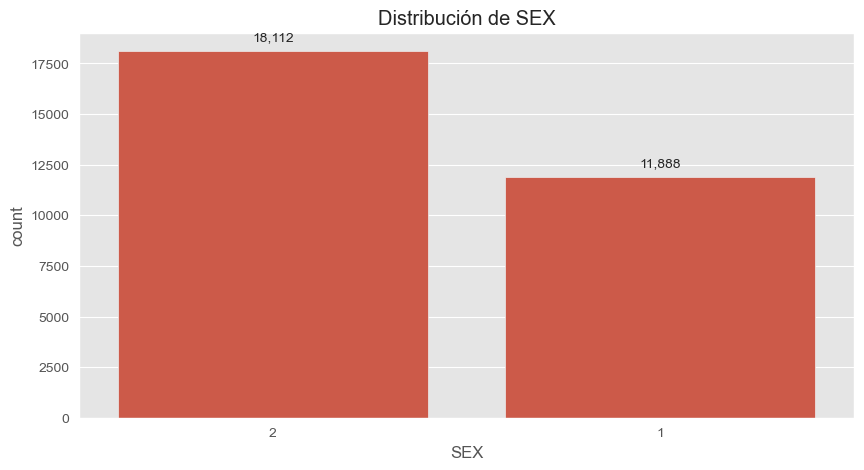


Distribución de EDUCATION:
EDUCATION
0    0.000467
1    0.352833
2    0.467667
3    0.163900
4    0.004100
5    0.009333
6    0.001700
Name: proportion, dtype: float64


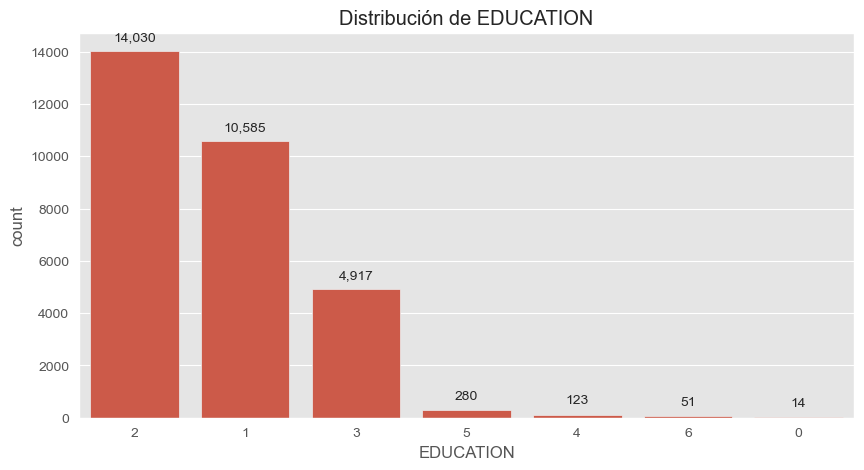


Distribución de MARRIAGE:
MARRIAGE
0    0.001800
1    0.455300
2    0.532133
3    0.010767
Name: proportion, dtype: float64


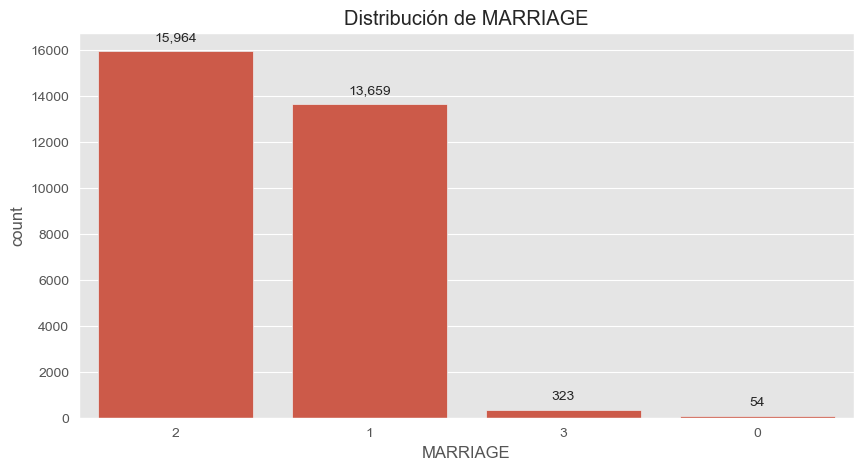


Distribución de PAY_0:
PAY_0
-2    0.091967
-1    0.189533
 0    0.491233
 1    0.122933
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 6    0.000367
 7    0.000300
 8    0.000633
Name: proportion, dtype: float64


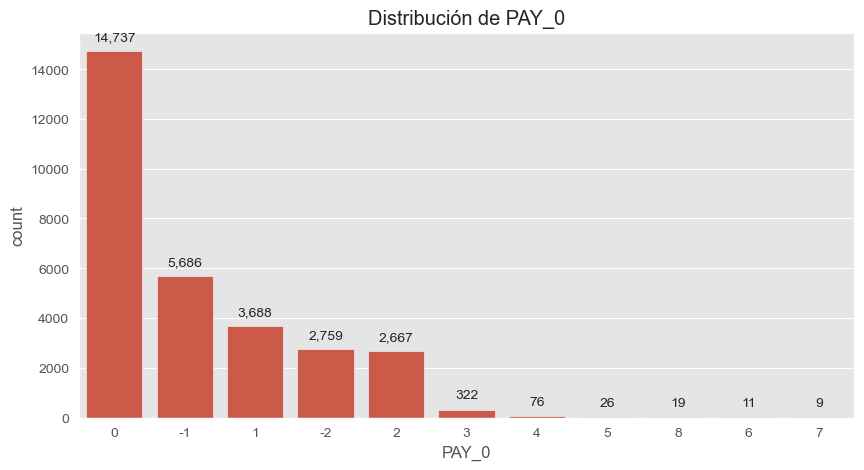


Distribución de PAY_2:
PAY_2
-2    0.126067
-1    0.201667
 0    0.524333
 1    0.000933
 2    0.130900
 3    0.010867
 4    0.003300
 5    0.000833
 6    0.000400
 7    0.000667
 8    0.000033
Name: proportion, dtype: float64


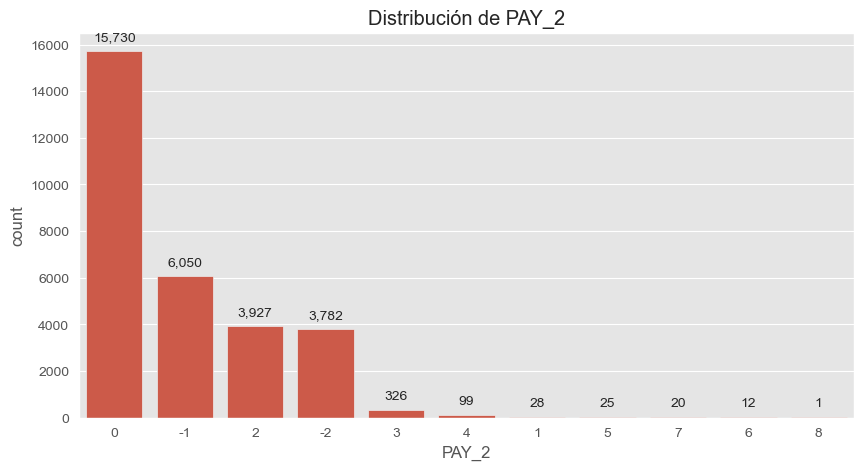


Distribución de PAY_3:
PAY_3
-2    0.136167
-1    0.197933
 0    0.525467
 1    0.000133
 2    0.127300
 3    0.008000
 4    0.002533
 5    0.000700
 6    0.000767
 7    0.000900
 8    0.000100
Name: proportion, dtype: float64


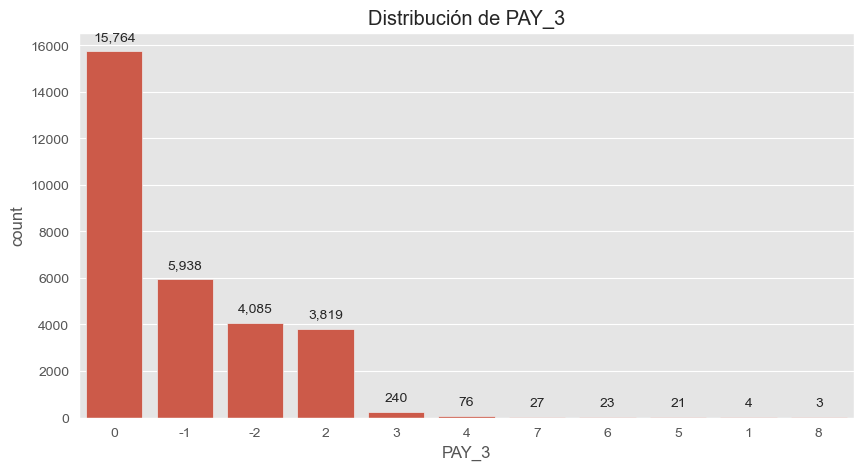


Distribución de PAY_4:
PAY_4
-2    0.144933
-1    0.189567
 0    0.548500
 1    0.000067
 2    0.105300
 3    0.006000
 4    0.002300
 5    0.001167
 6    0.000167
 7    0.001933
 8    0.000067
Name: proportion, dtype: float64


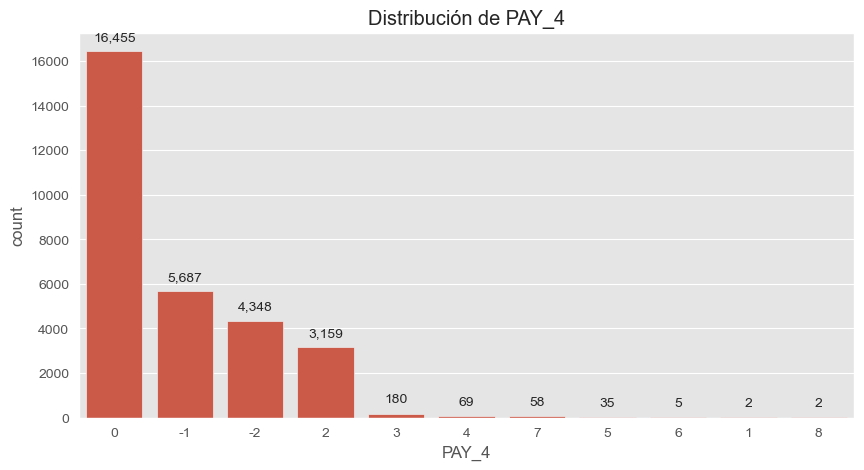


Distribución de PAY_5:
PAY_5
-2    0.151533
-1    0.184633
 0    0.564900
 2    0.087533
 3    0.005933
 4    0.002800
 5    0.000567
 6    0.000133
 7    0.001933
 8    0.000033
Name: proportion, dtype: float64


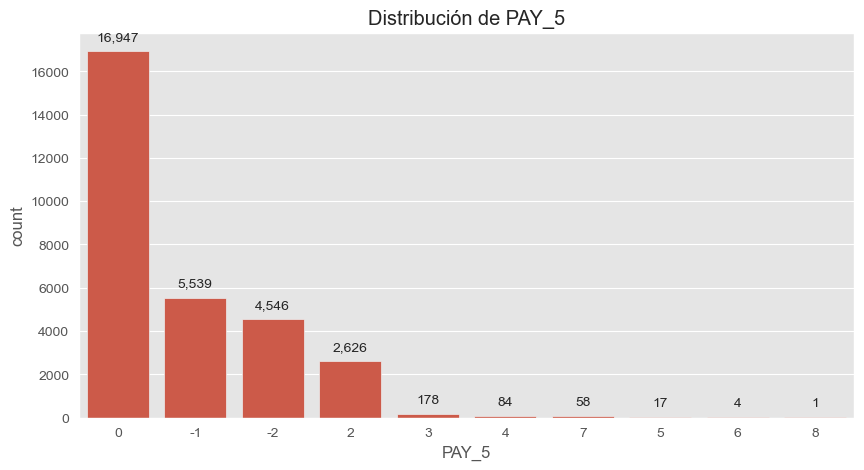


Distribución de PAY_6:
PAY_6
-2    0.163167
-1    0.191333
 0    0.542867
 2    0.092200
 3    0.006133
 4    0.001633
 5    0.000433
 6    0.000633
 7    0.001533
 8    0.000067
Name: proportion, dtype: float64


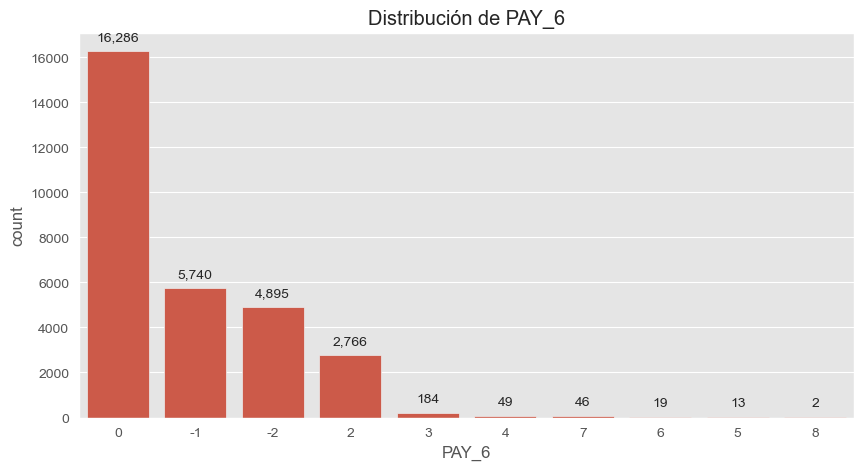

In [11]:
print("\n" + "="*50)
print("2. ANÁLISIS DE VARIABLES INDIVIDUALES")
print("="*50)

# Variables categóricas nominales (ajustar según tu dataset)
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE']  # Cambiar por las columnas categóricas reales de tu dataset
for var in cat_vars:
    if var in lalonde_df.columns:
        print(f"\nDistribución de {var}:")
        print(lalonde_df[var].value_counts(normalize=True).sort_index())
        plot_categorical(var, f'Distribución de {var}')

# Variables de pago (categóricas ordinales) - ajustar según tu dataset
pay_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']  # Cambiar si es necesario
for var in pay_vars:
    if var in lalonde_df.columns:
        print(f"\nDistribución de {var}:")
        print(lalonde_df[var].value_counts(normalize=True).sort_index())
        plot_categorical(var, f'Distribución de {var}')

## Análisis de variables continuas


Estadísticas descriptivas para LIMIT_BAL:
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


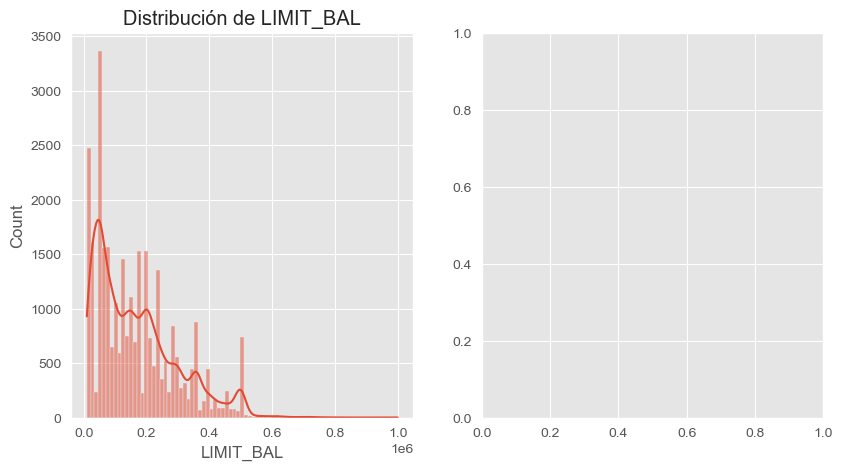

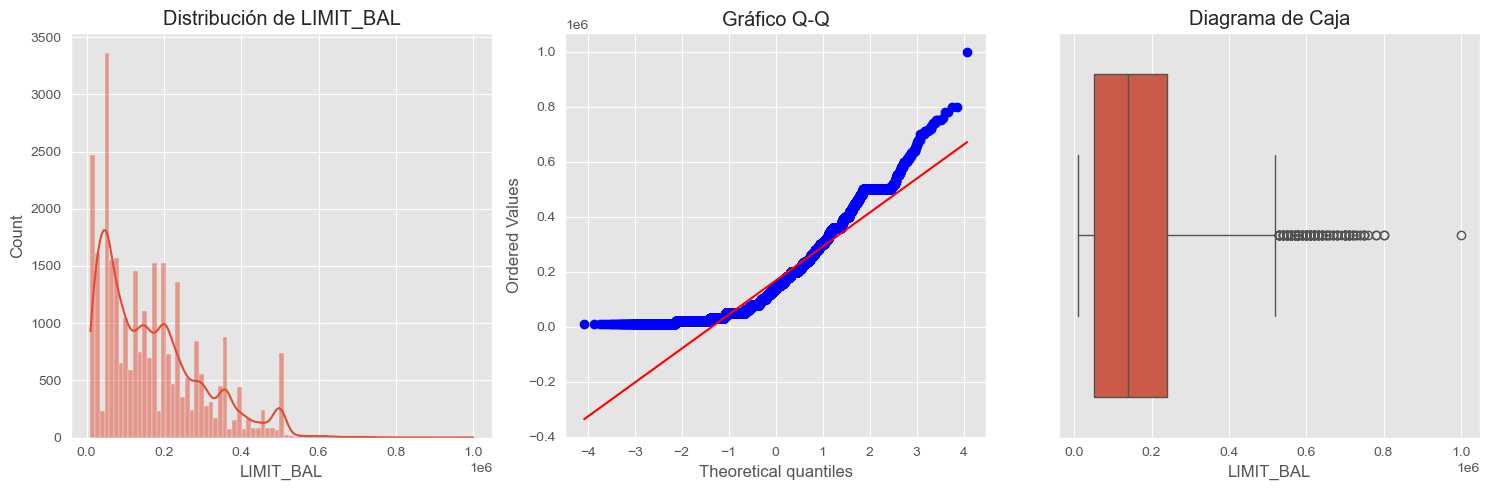


Estadísticas descriptivas para AGE:
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


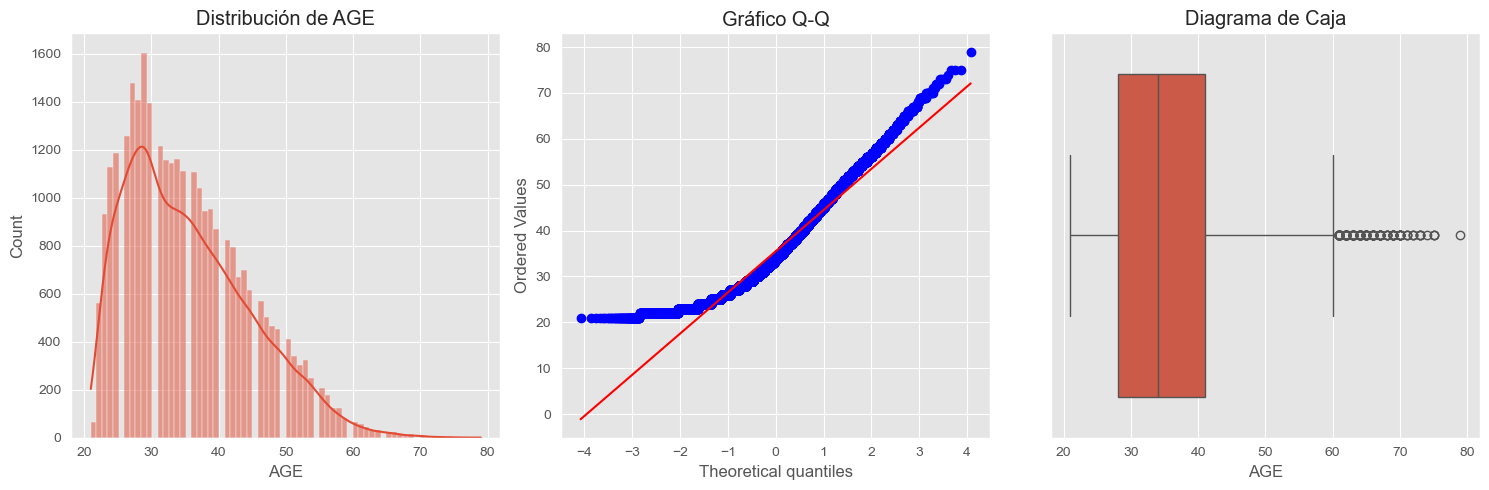


Estadísticas descriptivas para BILL_AMT1:
count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64


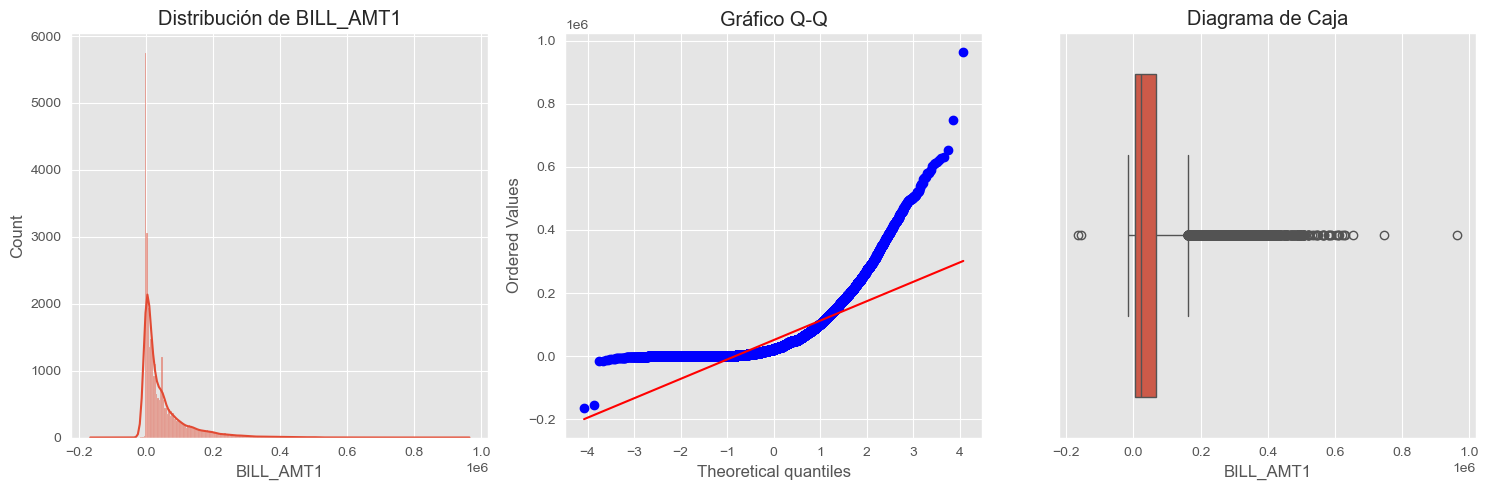


Estadísticas descriptivas para BILL_AMT2:
count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64


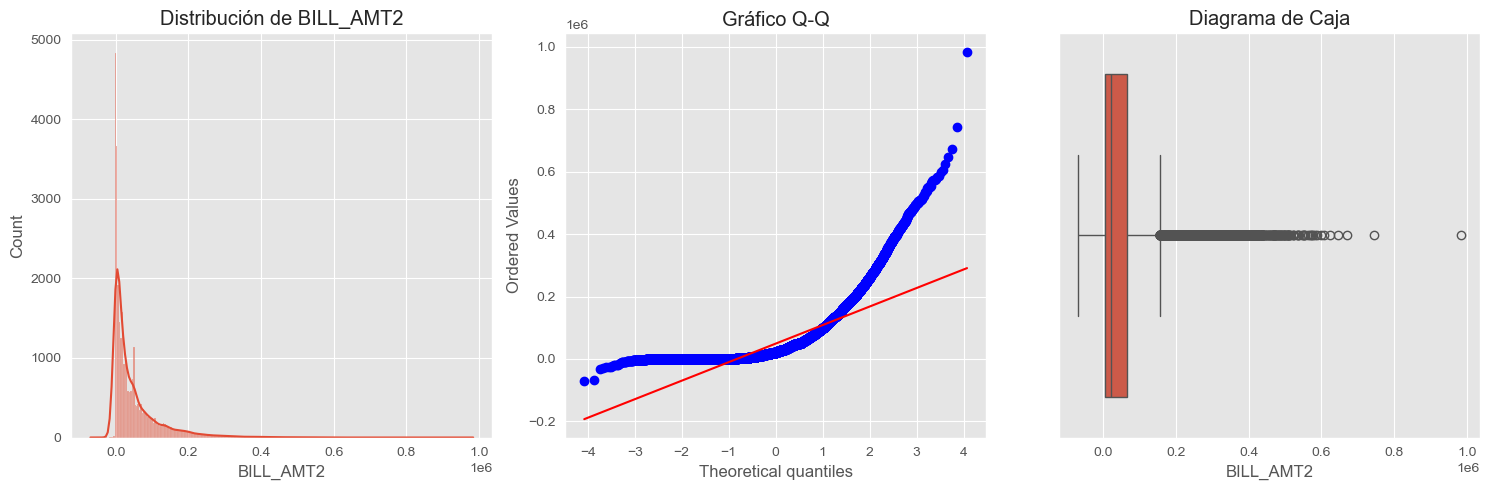


Estadísticas descriptivas para BILL_AMT3:
count    3.000000e+04
mean     4.701315e+04
std      6.934939e+04
min     -1.572640e+05
25%      2.666250e+03
50%      2.008850e+04
75%      6.016475e+04
max      1.664089e+06
Name: BILL_AMT3, dtype: float64


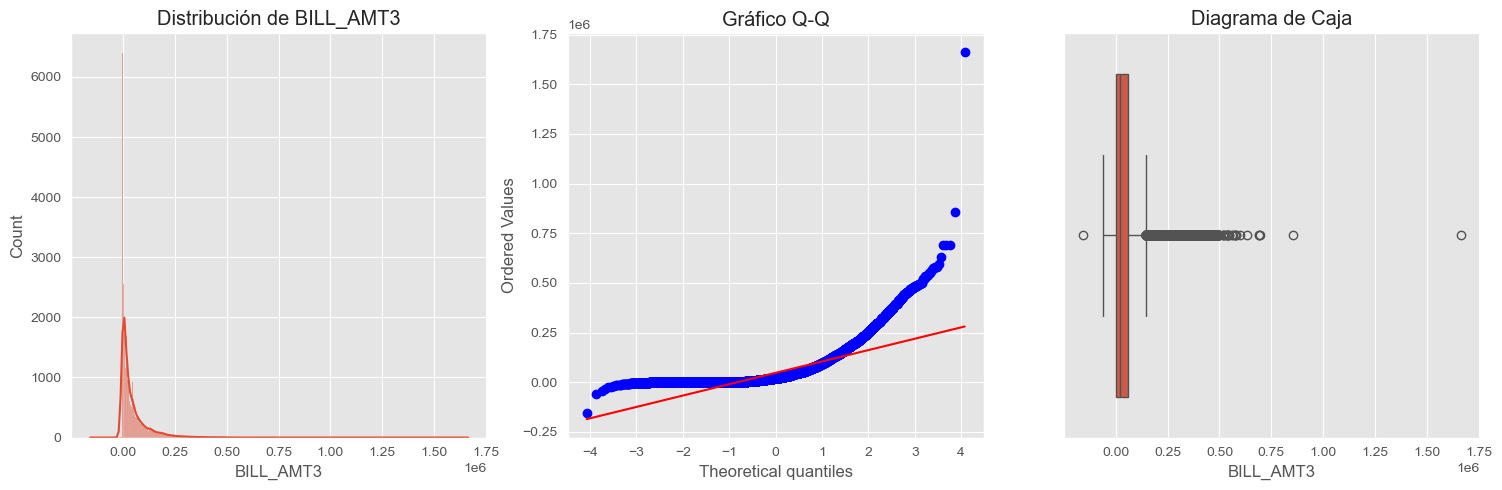


Estadísticas descriptivas para BILL_AMT4:
count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64


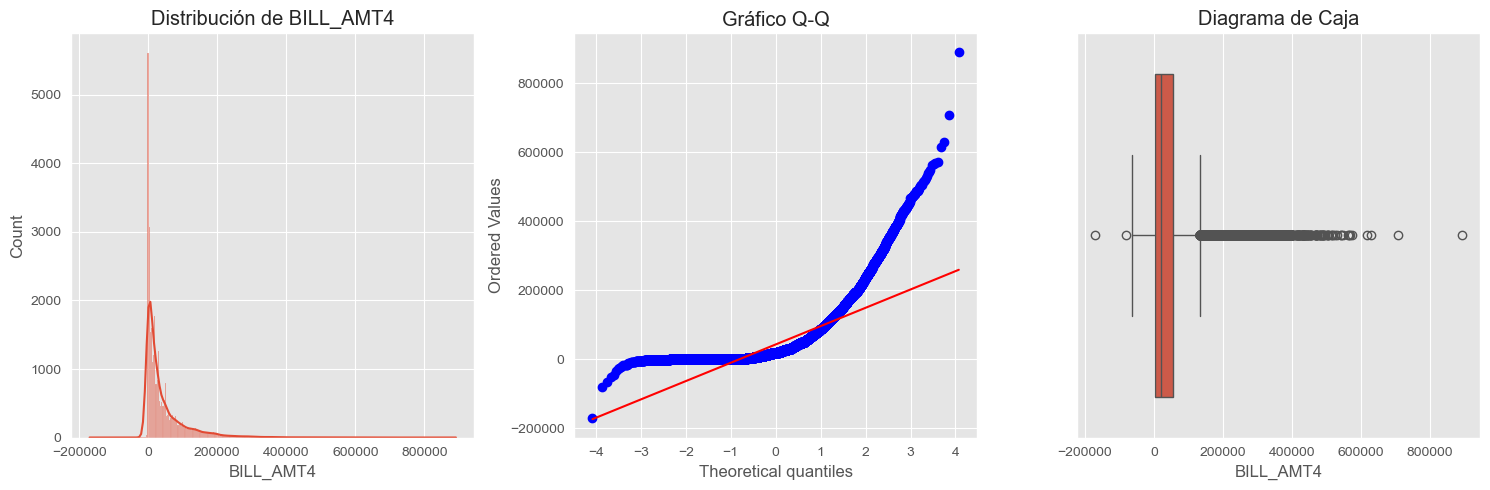


Estadísticas descriptivas para BILL_AMT5:
count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64


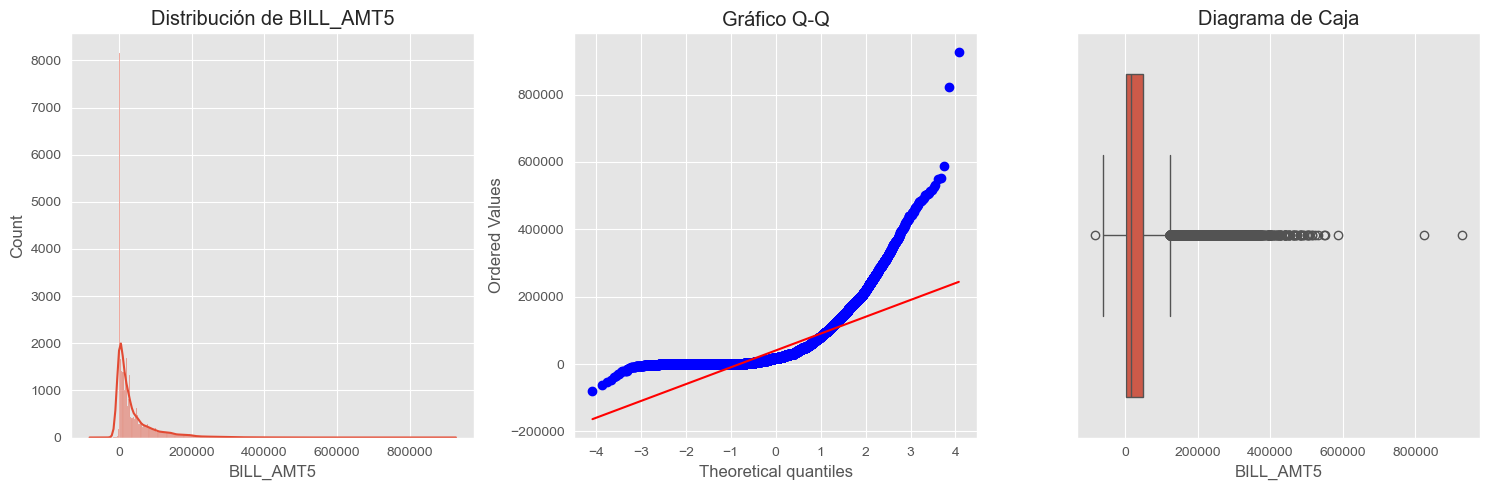


Estadísticas descriptivas para BILL_AMT6:
count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64


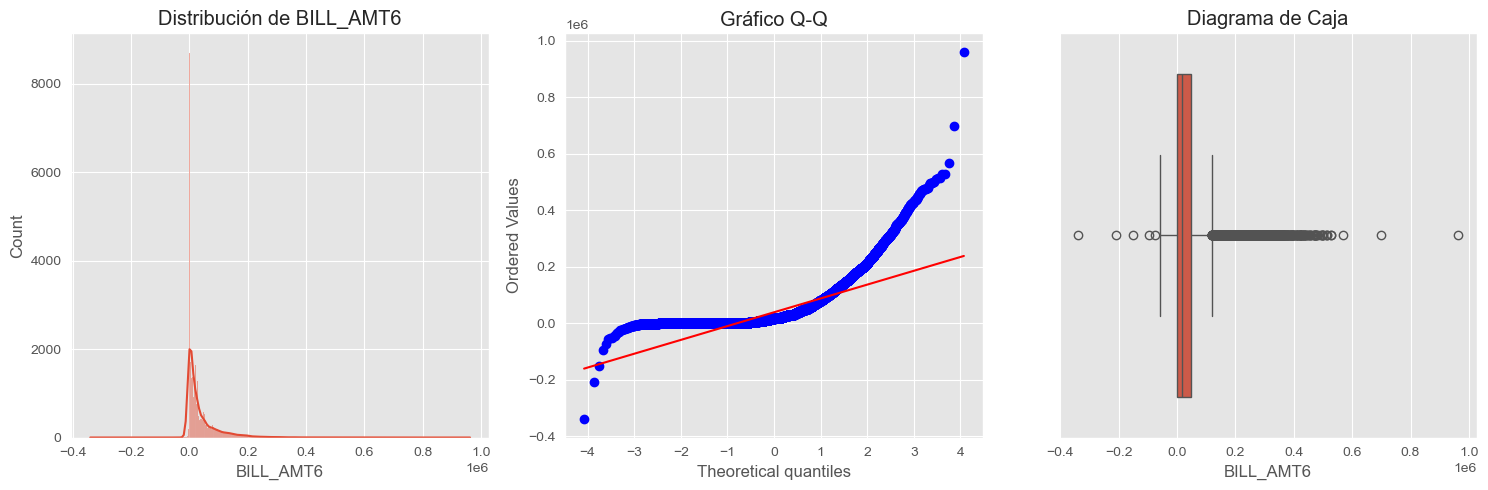


Estadísticas descriptivas para PAY_AMT1:
count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64


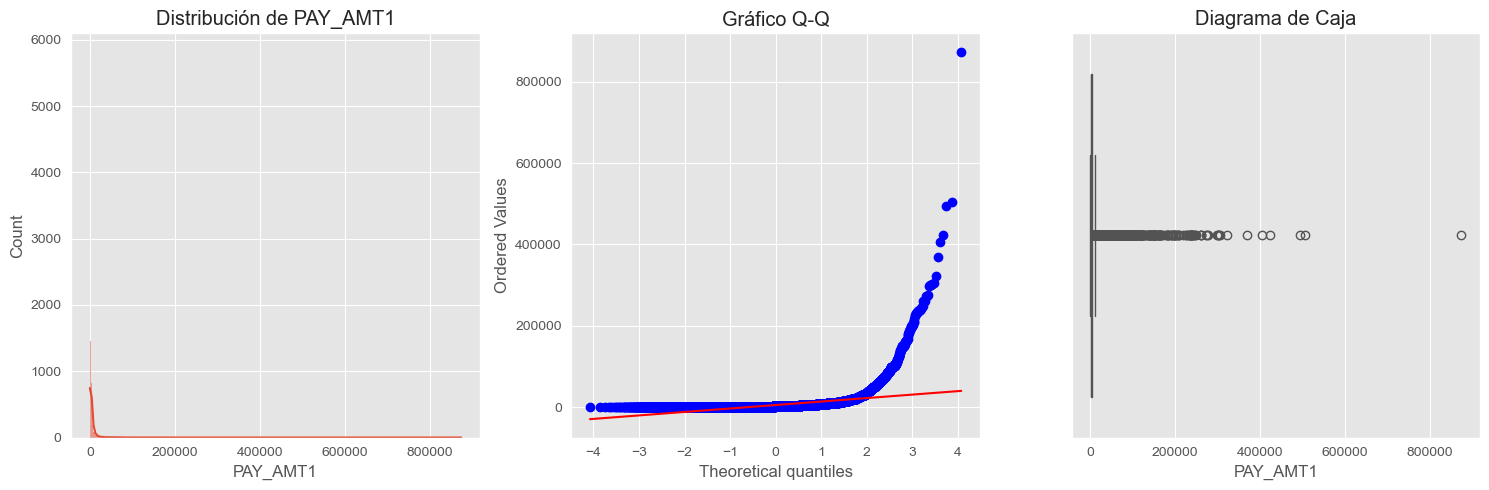


Estadísticas descriptivas para PAY_AMT2:
count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64


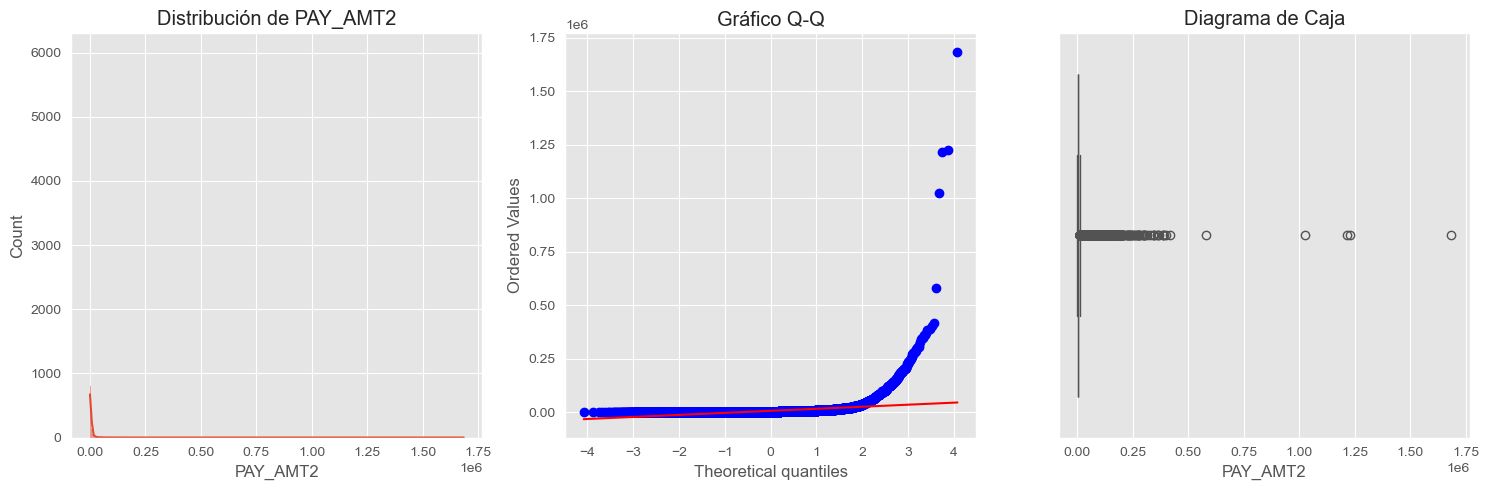


Estadísticas descriptivas para PAY_AMT3:
count     30000.00000
mean       5225.68150
std       17606.96147
min           0.00000
25%         390.00000
50%        1800.00000
75%        4505.00000
max      896040.00000
Name: PAY_AMT3, dtype: float64


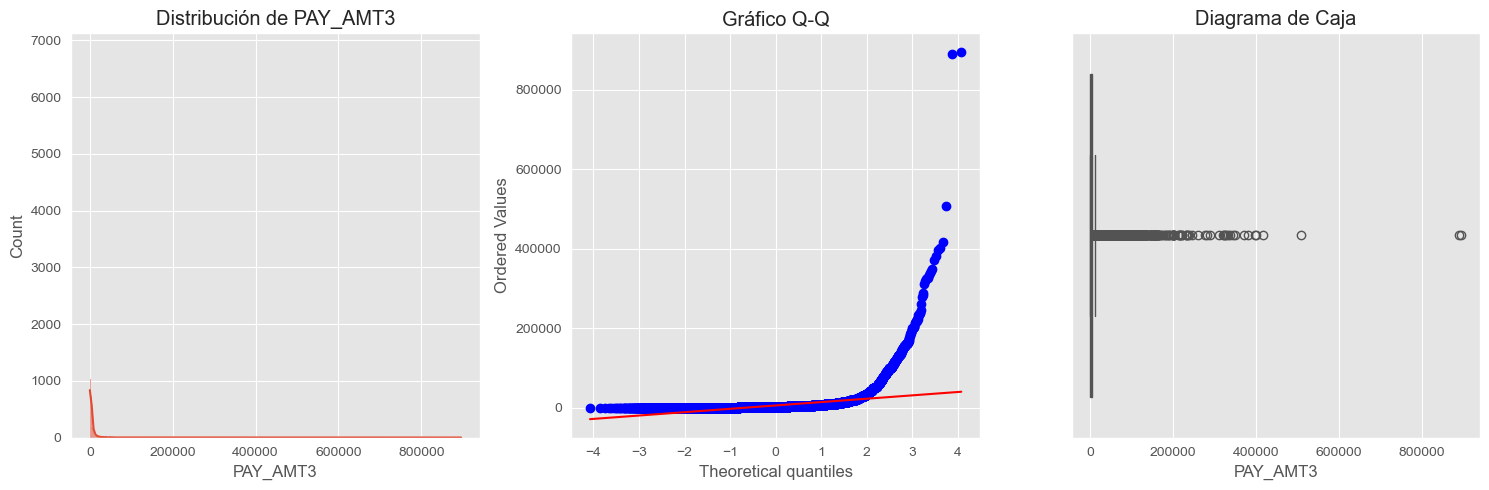


Estadísticas descriptivas para PAY_AMT4:
count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64


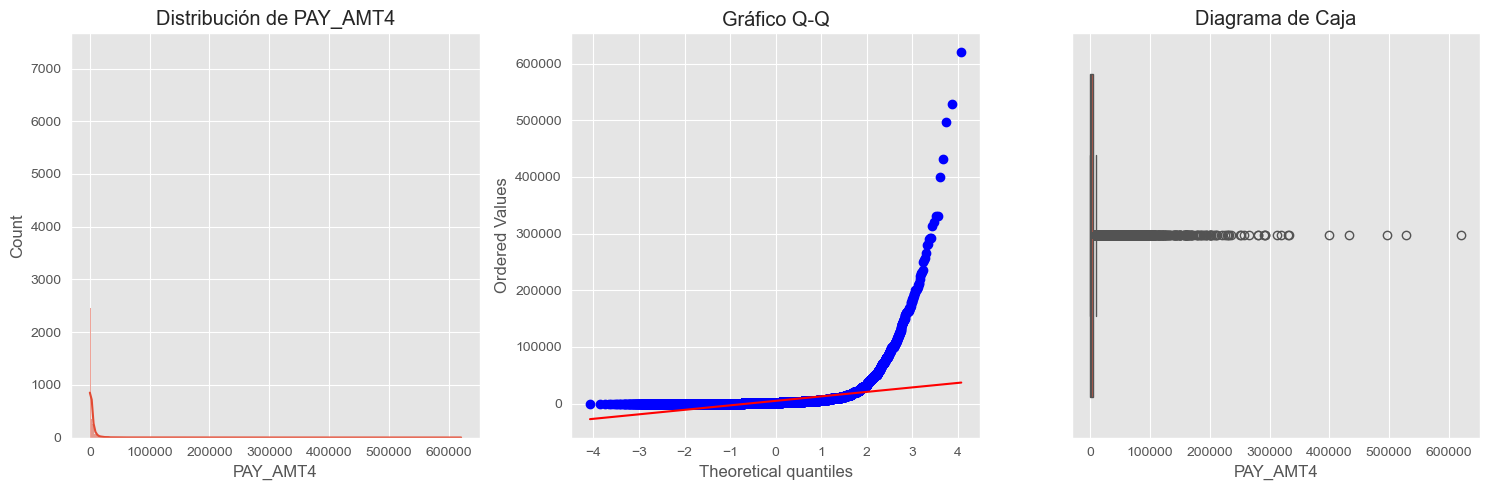


Estadísticas descriptivas para PAY_AMT5:
count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: PAY_AMT5, dtype: float64


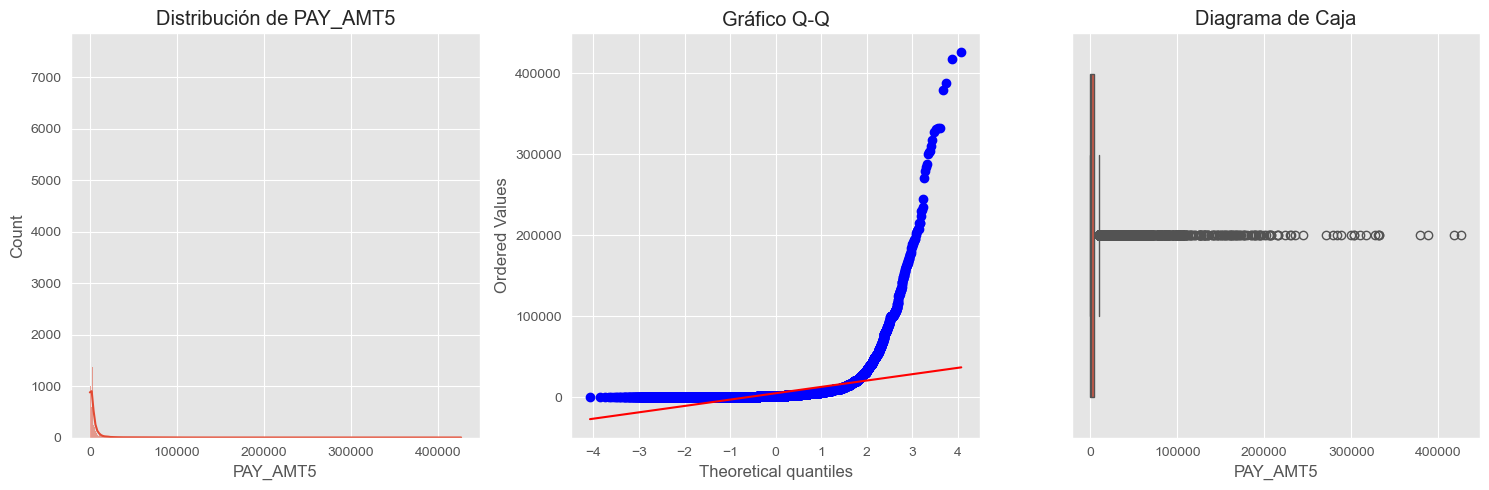


Estadísticas descriptivas para PAY_AMT6:
count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64


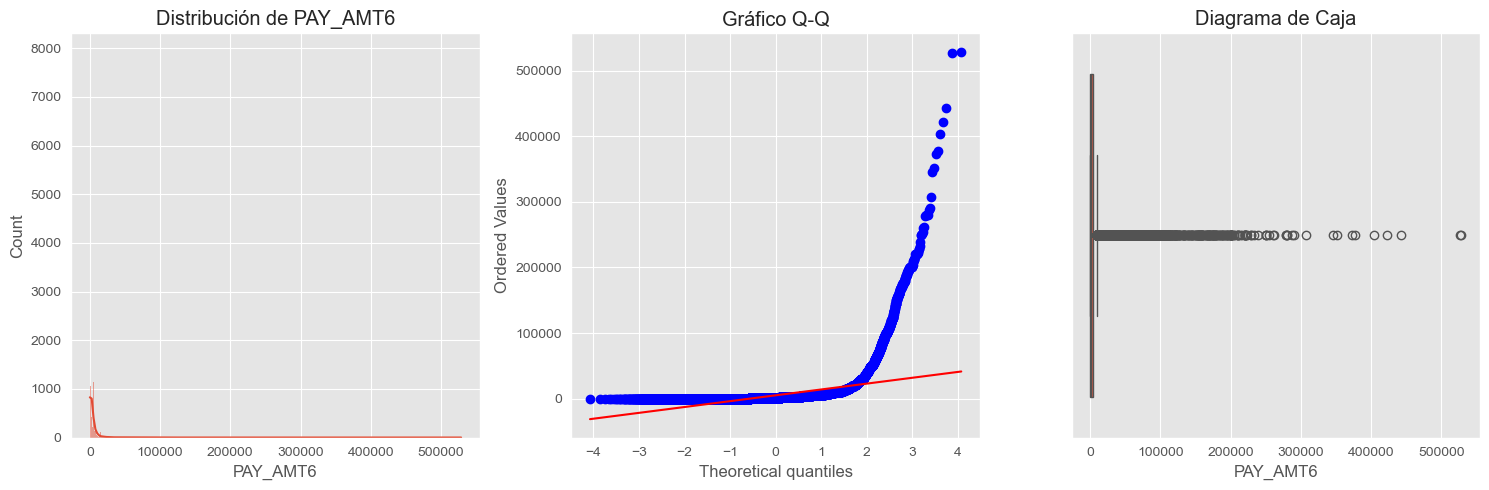

In [15]:
# Variables continuas (ajustar según tu dataset)
cont_vars = ['LIMIT_BAL', 'AGE', 
             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
             'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
             'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']  # Cambiar por las columnas numéricas de tu dataset

for var in cont_vars:
    if var in lalonde_df.columns:
        print(f"\nEstadísticas descriptivas para {var}:")
        print(lalonde_df[var].describe())
        plot_continuous(var, var)

## Análisis de la variable objetivo


3. ANÁLISIS DE LA VARIABLE OBJETIVO

Distribución de Default:
Default
0    0.7788
1    0.2212
Name: proportion, dtype: float64


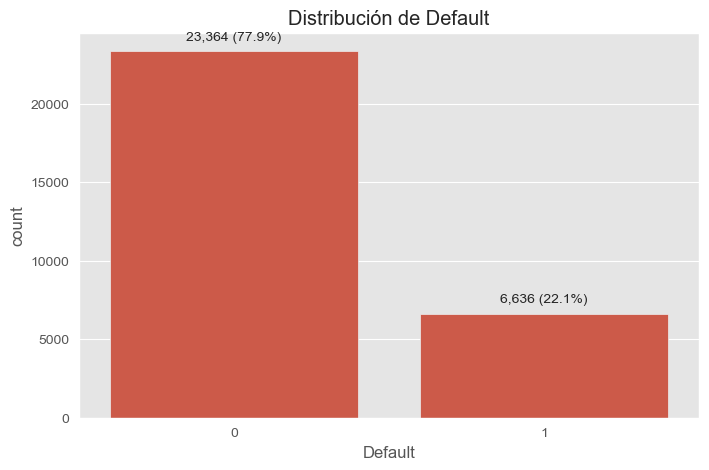


Relación entre SEX y Default:
Default         0         1
SEX                        
1        0.758328  0.241672
2        0.792237  0.207763


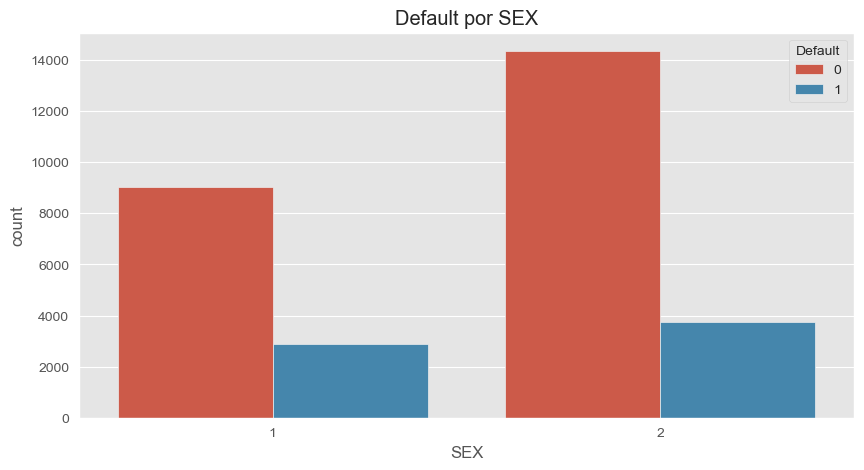


Relación entre EDUCATION y Default:
Default           0         1
EDUCATION                    
0          1.000000  0.000000
1          0.807652  0.192348
2          0.762651  0.237349
3          0.748424  0.251576
4          0.943089  0.056911
5          0.935714  0.064286
6          0.843137  0.156863


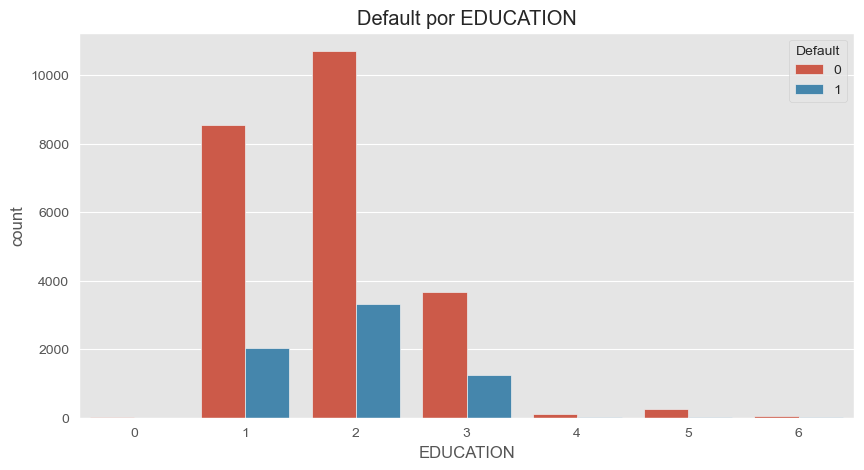


Relación entre MARRIAGE y Default:
Default          0         1
MARRIAGE                    
0         0.907407  0.092593
1         0.765283  0.234717
2         0.790717  0.209283
3         0.739938  0.260062


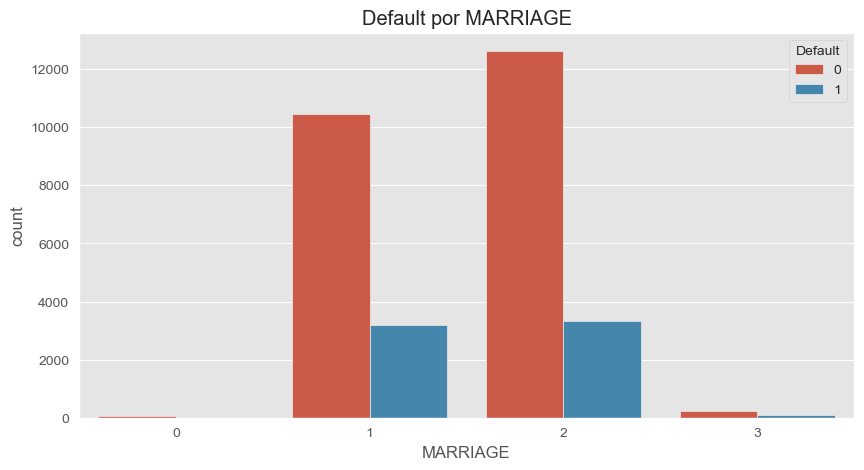


Relación entre LIMIT_BAL y Default:


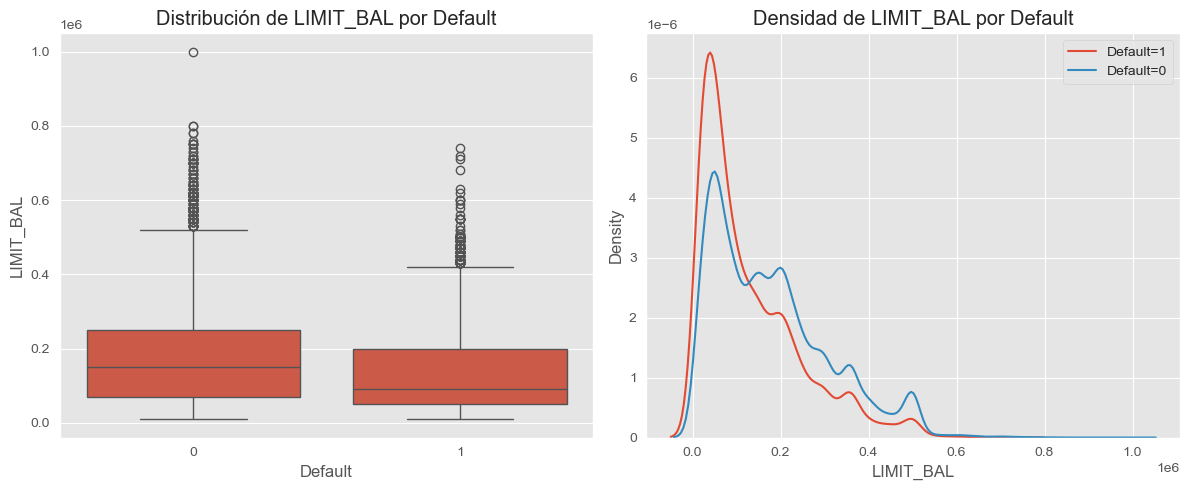


Relación entre AGE y Default:


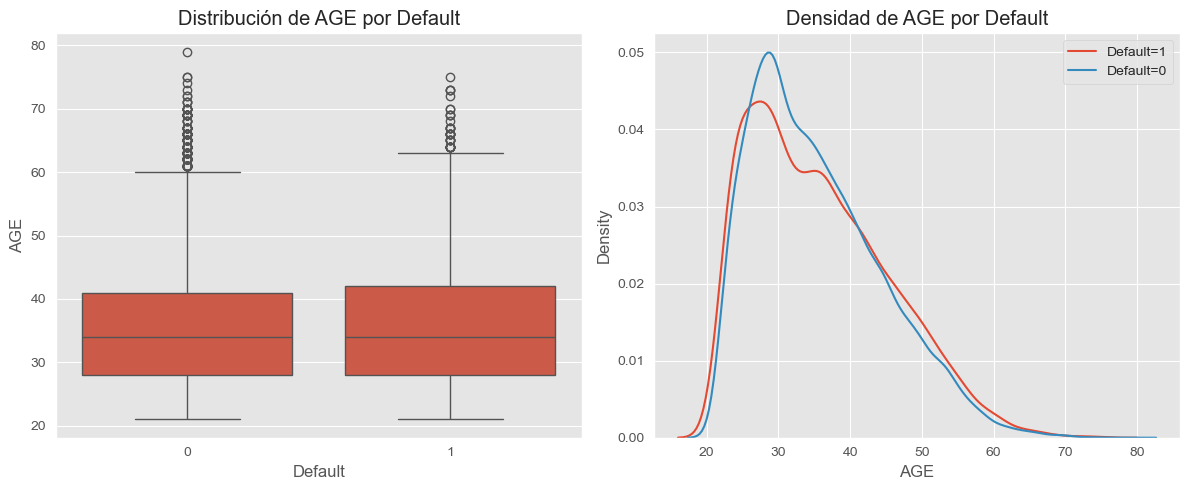


Relación entre BILL_AMT1 y Default:


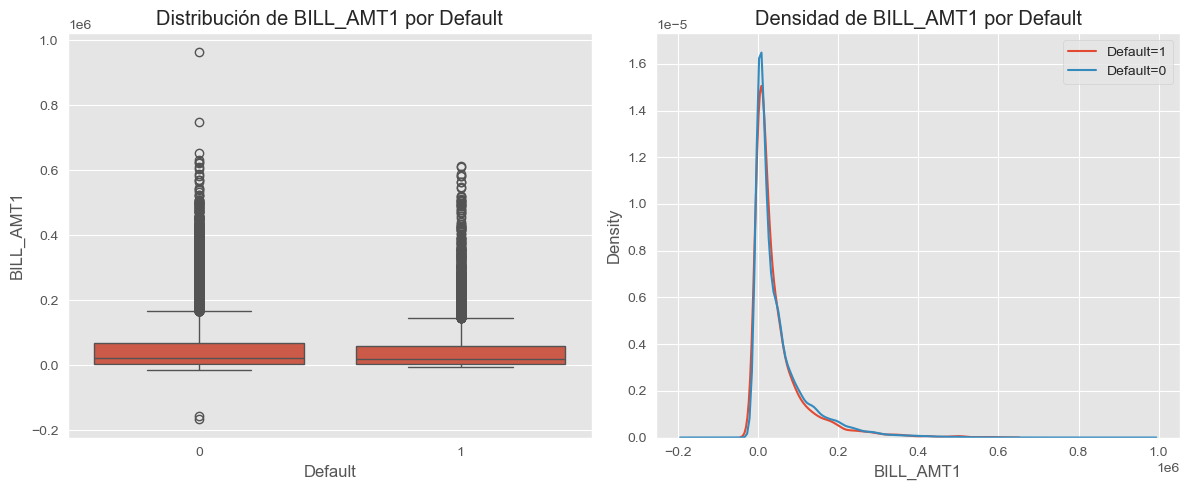


Relación entre PAY_AMT1 y Default:


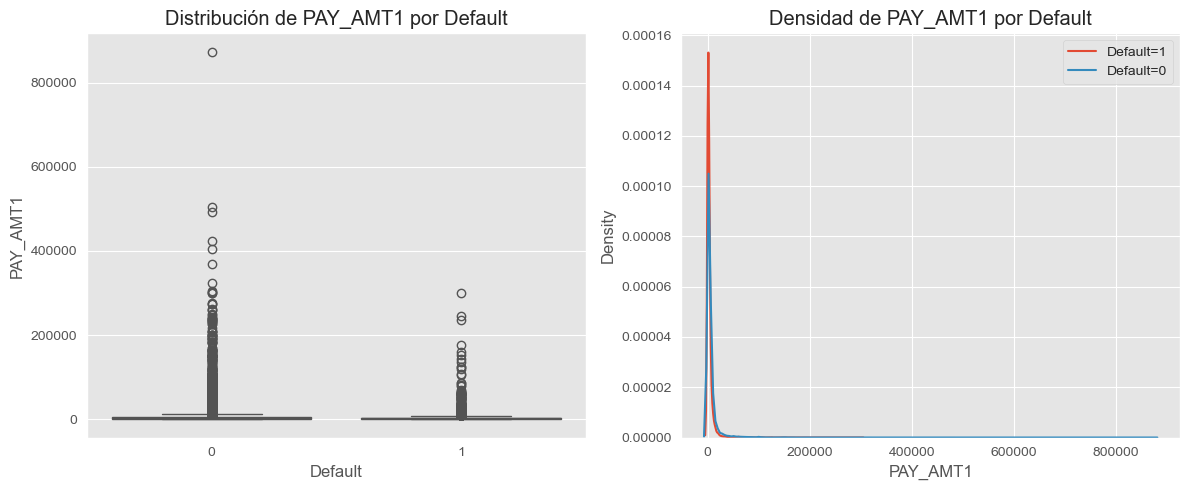

In [19]:
print("\n" + "="*50)
print("3. ANÁLISIS DE LA VARIABLE OBJETIVO")
print("="*50)

# Verificar si existe la columna objetivo en el dataframe
if 'default.payment.next.month' in lalonde_df.columns:
    target_var = 'default.payment.next.month'
elif 'DEFAULT' in lalonde_df.columns:
    target_var = 'DEFAULT'
elif 'Default' in lalonde_df.columns:
    target_var = 'Default'
else:
    target_var = None
    print("\nNo se encontró la columna objetivo en el dataset")
    print("Columnas disponibles:", lalonde_df.columns.tolist())

if target_var:
    # 1. Distribución de la variable objetivo
    print(f"\nDistribución de {target_var}:")
    dist = lalonde_df[target_var].value_counts(normalize=True)
    print(dist)
    
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=target_var, data=lalonde_df)
    plt.title(f'Distribución de {target_var}')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f} ({p.get_height()/len(lalonde_df):.1%})', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points')
    plt.show()
    
    # 2. Relación con variables categóricas
    categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
    for var in categorical_vars:
        if var in lalonde_df.columns:
            print(f"\nRelación entre {var} y {target_var}:")
            print(pd.crosstab(lalonde_df[var], lalonde_df[target_var], normalize='index'))
            
            plt.figure(figsize=(10, 5))
            sns.countplot(x=var, hue=target_var, data=lalonde_df)
            plt.title(f'{target_var} por {var}')
            plt.show()
    
    # 3. Relación con variables continuas
    continuous_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
    for var in continuous_vars:
        if var in lalonde_df.columns:
            print(f"\nRelación entre {var} y {target_var}:")
            
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            sns.boxplot(x=target_var, y=var, data=lalonde_df)
            plt.title(f'Distribución de {var} por {target_var}')
            
            plt.subplot(1, 2, 2)
            for value in lalonde_df[target_var].unique():
                sns.kdeplot(lalonde_df[lalonde_df[target_var]==value][var], 
                            label=f'{target_var}={value}')
            plt.title(f'Densidad de {var} por {target_var}')
            plt.legend()
            
            plt.tight_layout()
            plt.show()

## Análisis de correlaciones


4. ANÁLISIS DE CORRELACIONES


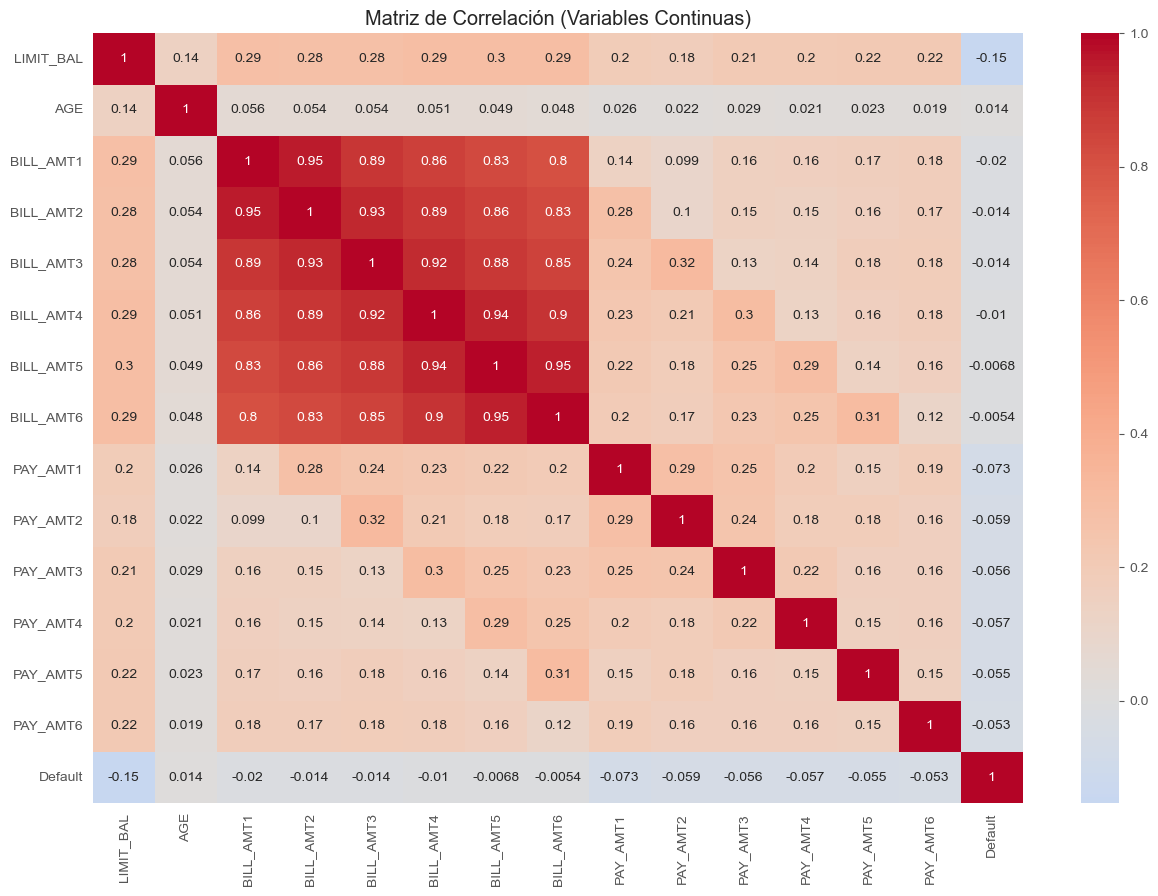


Correlación de variables categóricas con el default (ANOVA F-value):
SEX: F-value = 47.98, p-value = 0.0000
EDUCATION: F-value = 27.35, p-value = 0.0000
MARRIAGE: F-value = 11.90, p-value = 0.0000
PAY_0: F-value = 653.24, p-value = 0.0000
PAY_2: F-value = 392.81, p-value = 0.0000
PAY_3: F-value = 287.26, p-value = 0.0000
PAY_4: F-value = 253.88, p-value = 0.0000
PAY_5: F-value = 263.40, p-value = 0.0000
PAY_6: F-value = 223.64, p-value = 0.0000


In [20]:
print("\n" + "="*50)
print("4. ANÁLISIS DE CORRELACIONES")
print("="*50)

# Matriz de correlación (solo variables numéricas)
if target_var in lalonde_df.columns:
    numeric_vars = [var for var in cont_vars if var in lalonde_df.columns] + [target_var]
    corr_matrix = lalonde_df[numeric_vars].corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación (Variables Continuas)')
    plt.show()

# Correlación de variables categóricas (ANOVA)
if target_var in lalonde_df.columns:
    print("\nCorrelación de variables categóricas con el default (ANOVA F-value):")
    for var in cat_vars + pay_vars:
        if var in lalonde_df.columns:
            groups = [lalonde_df[lalonde_df[var] == val][target_var] for val in lalonde_df[var].unique()]
            f_val, p_val = stats.f_oneway(*groups)
            print(f"{var}: F-value = {f_val:.2f}, p-value = {p_val:.4f}")

## Análisis temporal y multivariado

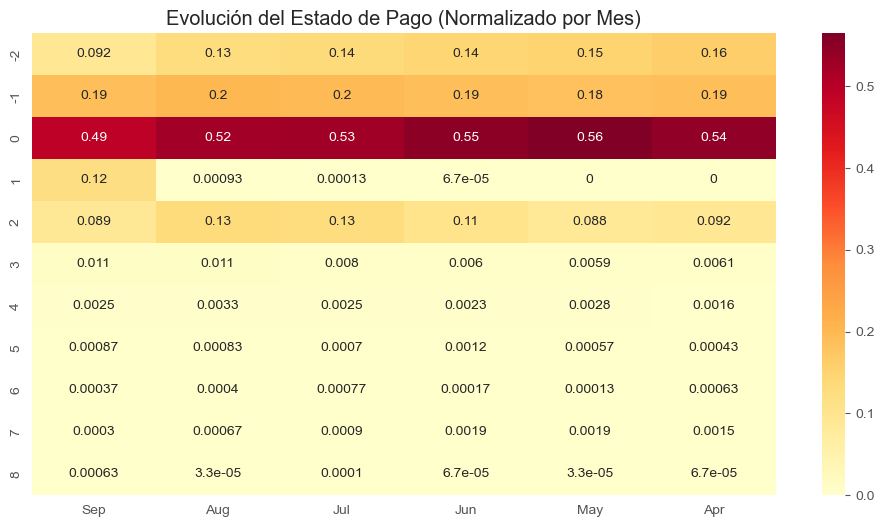

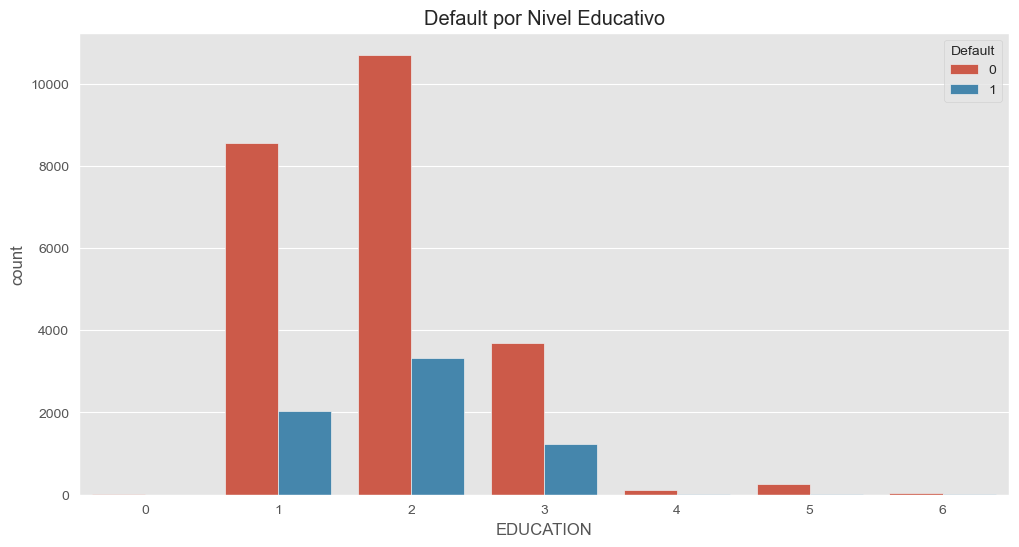

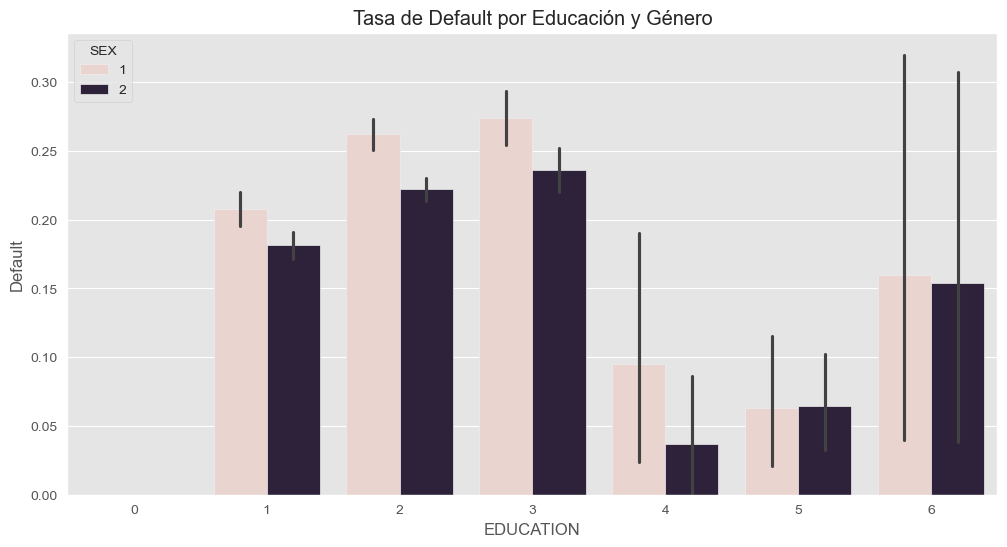

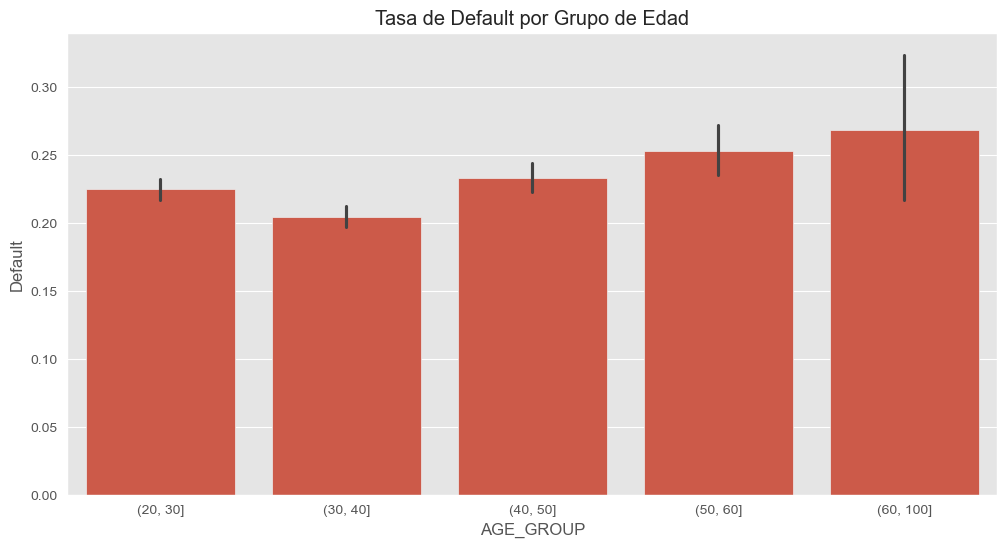

In [21]:
# Evolución del estado de pago (ajustar según tus columnas)
pay_status_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']  # Cambiar si es necesario
pay_status_cols = [col for col in pay_status_cols if col in lalonde_df.columns]

if pay_status_cols:
    pay_status = lalonde_df[pay_status_cols]
    pay_status.columns = ['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr'][:len(pay_status_cols)]
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(pay_status.apply(pd.Series.value_counts, normalize=True).fillna(0), 
                annot=True, cmap='YlOrRd')
    plt.title('Evolución del Estado de Pago (Normalizado por Mes)')
    plt.show()

# Análisis multivariado (ajustar según tus variables)
if 'EDUCATION' in lalonde_df.columns and target_var in lalonde_df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='EDUCATION', hue=target_var, data=lalonde_df)
    plt.title('Default por Nivel Educativo')
    plt.show()

if 'EDUCATION' in lalonde_df.columns and 'SEX' in lalonde_df.columns and target_var in lalonde_df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='EDUCATION', y=target_var, hue='SEX', data=lalonde_df)
    plt.title('Tasa de Default por Educación y Género')
    plt.show()

if 'AGE' in lalonde_df.columns and target_var in lalonde_df.columns:
    lalonde_df['AGE_GROUP'] = pd.cut(lalonde_df['AGE'], bins=[20, 30, 40, 50, 60, 100])
    plt.figure(figsize=(12, 6))
    sns.barplot(x='AGE_GROUP', y=target_var, data=lalonde_df)
    plt.title('Tasa de Default por Grupo de Edad')
    plt.show()

## Detección de valores atípicos y resumen final


8. DETECCIÓN DE VALORES ATÍPICOS

Valores atípicos en LIMIT_BAL: 167 (0.56%)


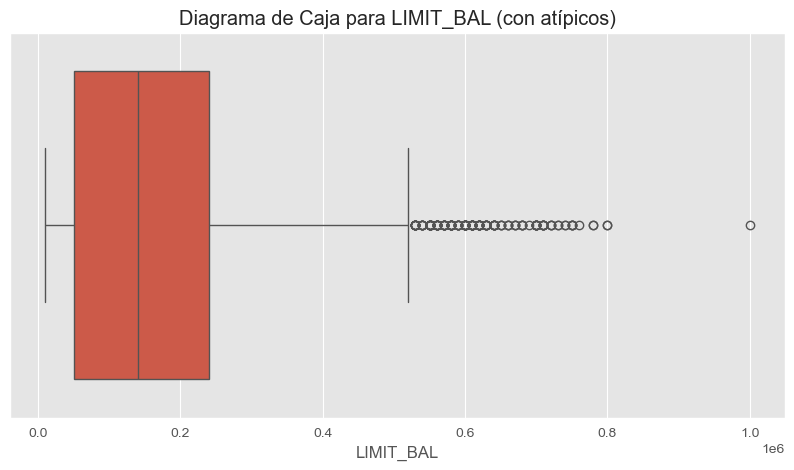


Valores atípicos en AGE: 272 (0.91%)


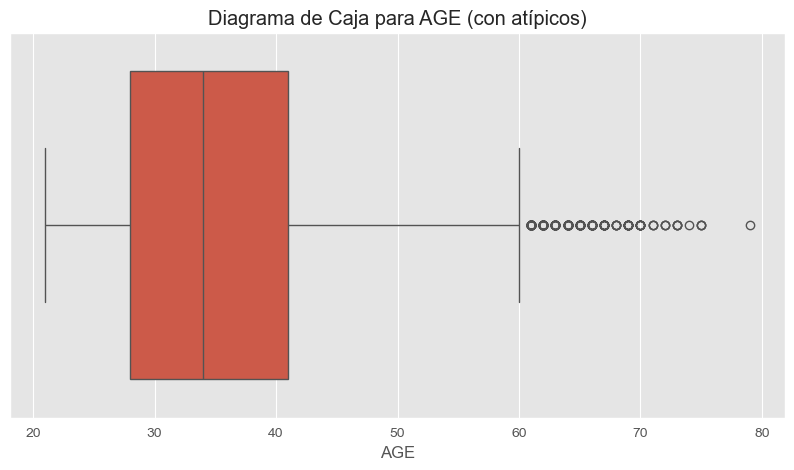


Valores atípicos en BILL_AMT1: 2400 (8.00%)


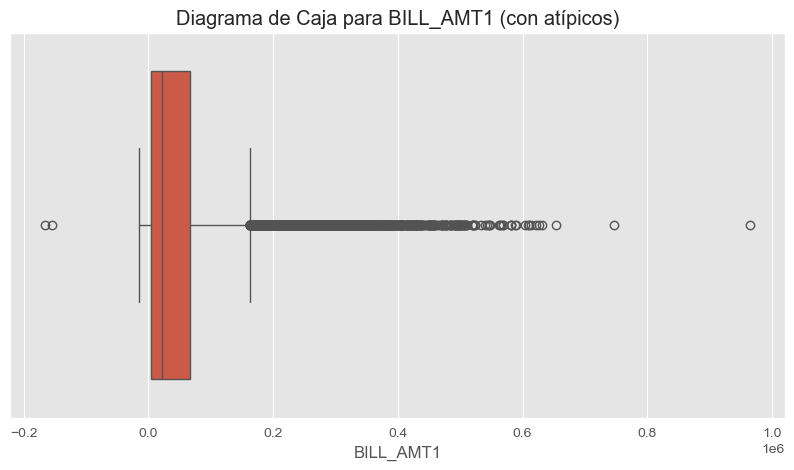


Valores atípicos en BILL_AMT2: 2395 (7.98%)


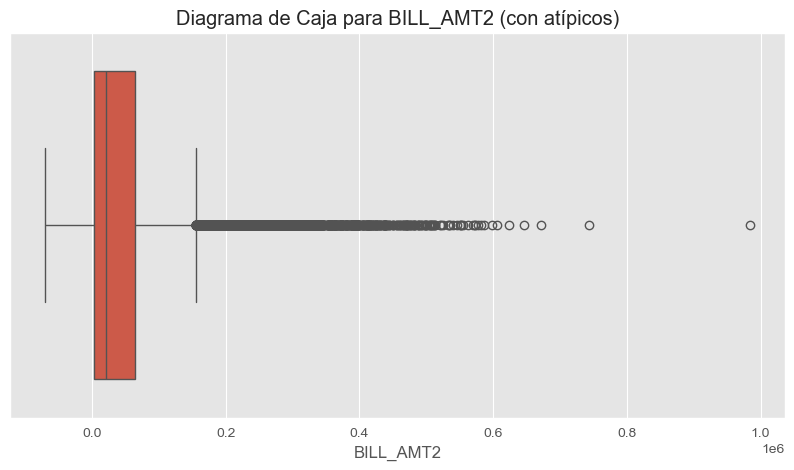


Valores atípicos en BILL_AMT3: 2469 (8.23%)


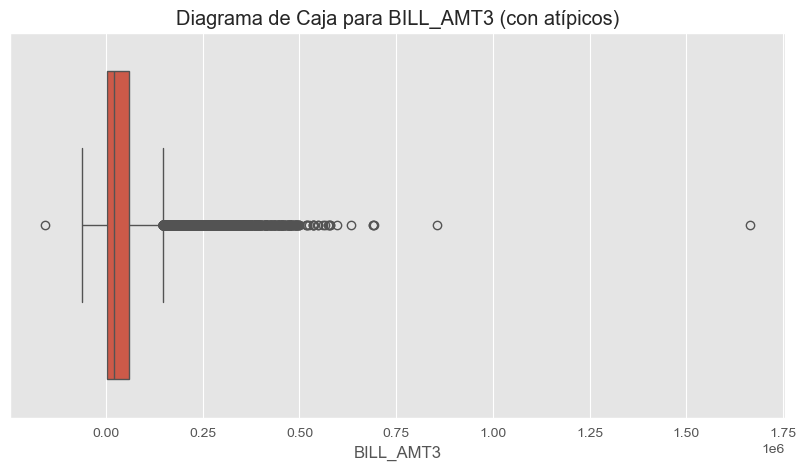


Valores atípicos en BILL_AMT4: 2622 (8.74%)


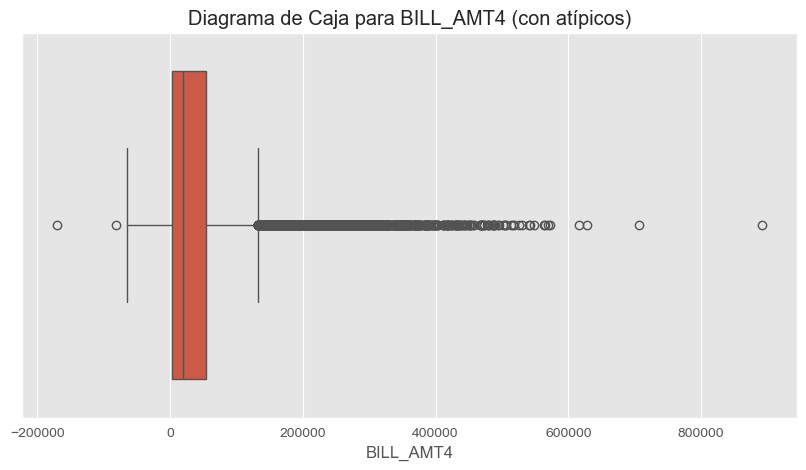


Valores atípicos en BILL_AMT5: 2725 (9.08%)


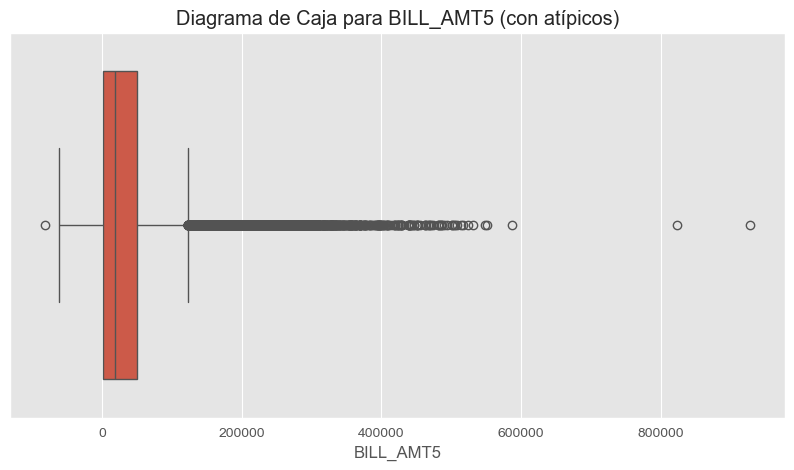


Valores atípicos en BILL_AMT6: 2693 (8.98%)


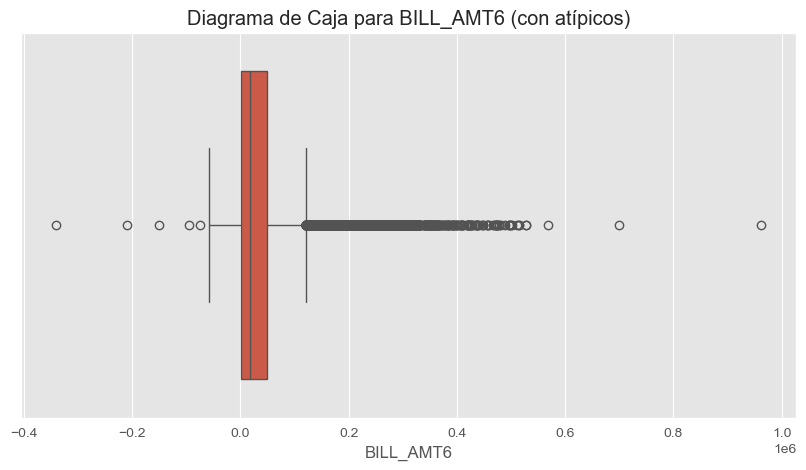


Valores atípicos en PAY_AMT1: 2745 (9.15%)


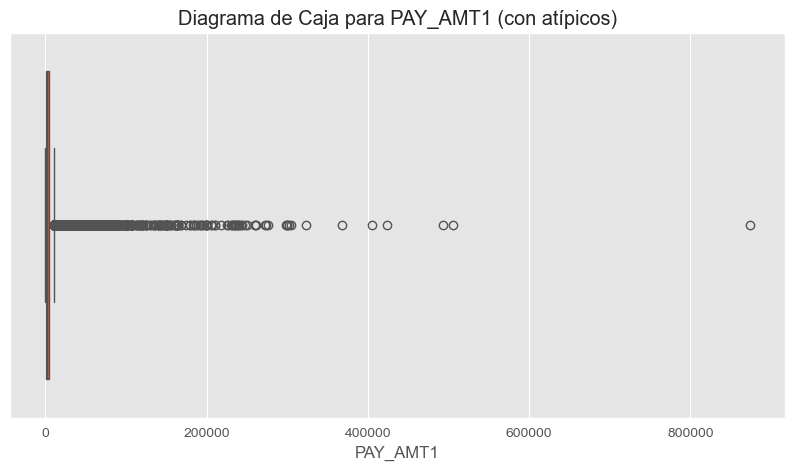


Valores atípicos en PAY_AMT2: 2714 (9.05%)


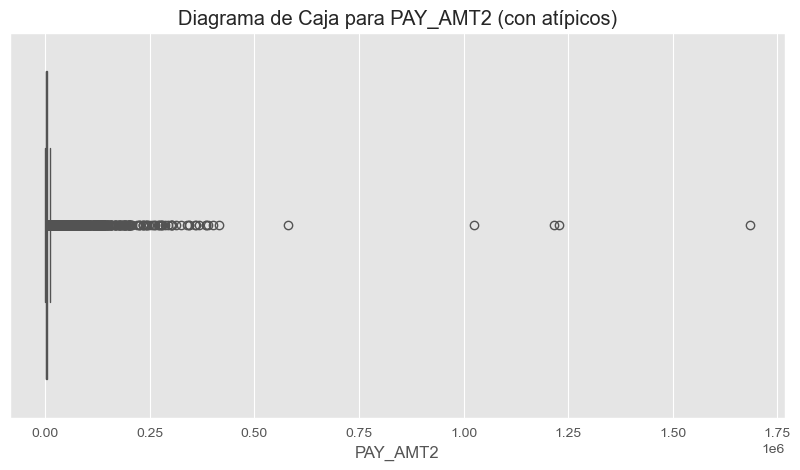


Valores atípicos en PAY_AMT3: 2598 (8.66%)


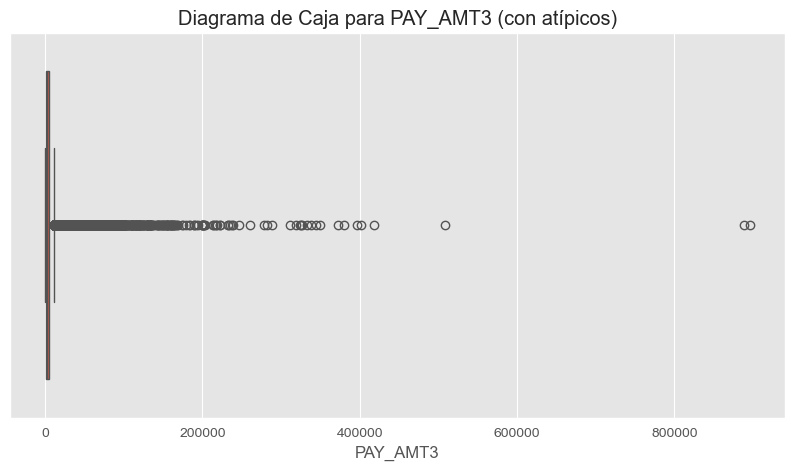


Valores atípicos en PAY_AMT4: 2994 (9.98%)


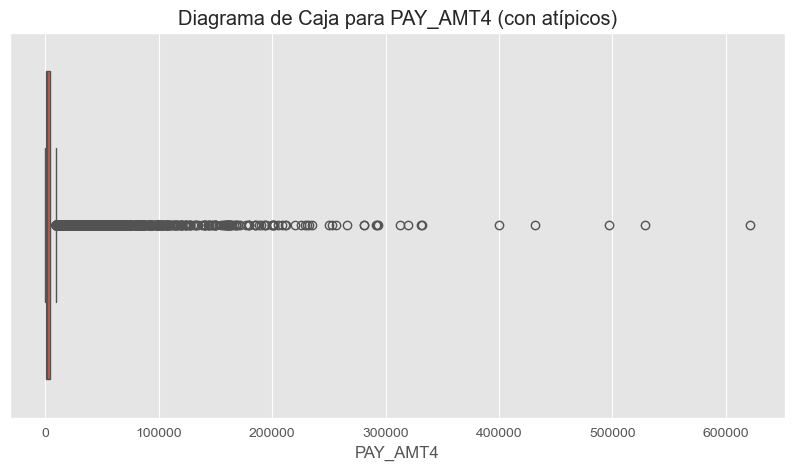


Valores atípicos en PAY_AMT5: 2945 (9.82%)


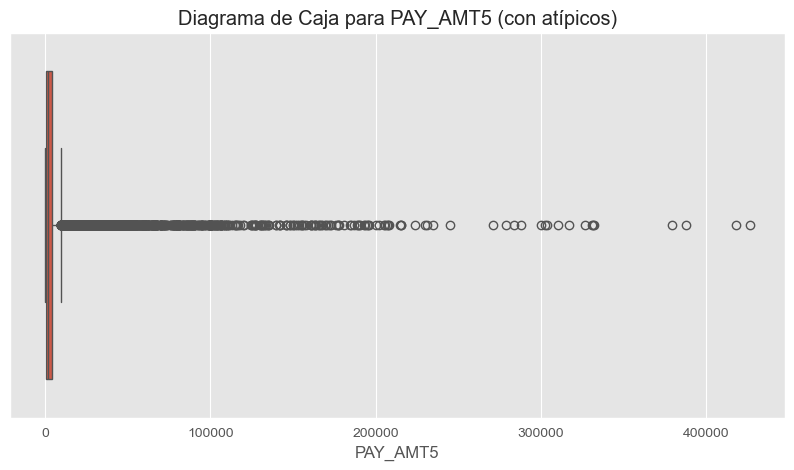


Valores atípicos en PAY_AMT6: 2958 (9.86%)


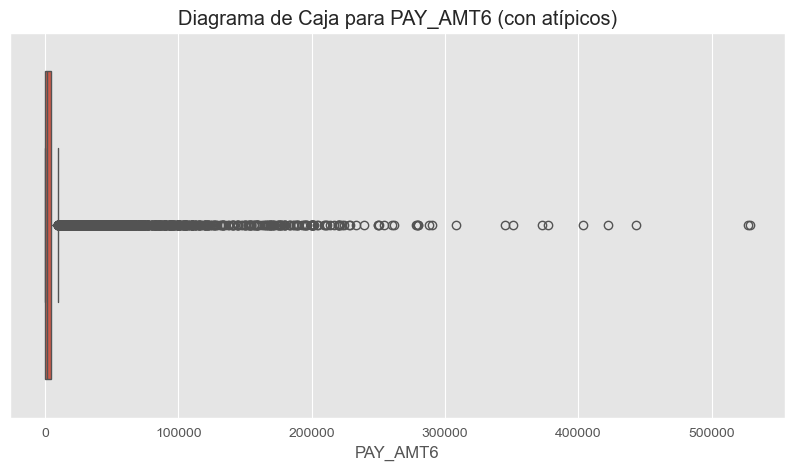


9. RESUMEN Y CONCLUSIONES

Resumen estadístico de variables continuas:
            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000

In [22]:
# Detección de outliers
print("\n" + "="*50)
print("8. DETECCIÓN DE VALORES ATÍPICOS")
print("="*50)

for var in cont_vars:
    if var in lalonde_df.columns:
        q1 = lalonde_df[var].quantile(0.25)
        q3 = lalonde_df[var].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = lalonde_df[(lalonde_df[var] < lower_bound) | (lalonde_df[var] > upper_bound)]
        print(f"\nValores atípicos en {var}: {len(outliers)} ({len(outliers)/len(lalonde_df):.2%})")
        
        if len(outliers) > 0:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=lalonde_df[var])
            plt.title(f'Diagrama de Caja para {var} (con atípicos)')
            plt.show()

# Resumen final
print("\n" + "="*50)
print("9. RESUMEN Y CONCLUSIONES")
print("="*50)

# Resumen variables continuas
numeric_vars = [var for var in cont_vars if var in lalonde_df.columns]
if numeric_vars:
    print("\nResumen estadístico de variables continuas:")
    print(lalonde_df[numeric_vars].describe())

if target_var in lalonde_df.columns:
    default_rate = lalonde_df[target_var].mean()
    print(f"\nTasa global de default: {default_rate:.2%}")

# Exportar resultados
lalonde_df.to_csv('processed_client_data.csv', index=False)
print("\nEDA completado. Datos procesados guardados en 'processed_client_data.csv'")

## Information value

In [1]:
import pandas as pd
import numpy as np

def calculate_woe_iv_by_age(df):
    """
    Calcula el Weight of Evidence (WoE) e Information Value (IV) por edad.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame que debe contener las columnas 'AGE' y 'Default'
        
    Returns:
    --------
    tuple: (DataFrame con análisis detallado por edad, 
            DataFrame con análisis por grupos de edad,
            float con el IV total)
    """
    
    # 1. Preparación de datos por edad individual
    age_analysis = df.groupby('AGE')['Default'].agg(
        Exitos='sum',
        Total='count'
    ).reset_index().rename(columns={'AGE': 'Edad'})
    
    # 2. Cálculo de proporciones y WoE
    age_analysis['%Eventos'] = age_analysis['Exitos'] / age_analysis['Exitos'].sum()
    age_analysis['%No_Eventos'] = ((age_analysis['Total'] - age_analysis['Exitos']) / 
                                  (age_analysis['Total'] - age_analysis['Exitos']).sum())
    age_analysis['WoE'] = np.log(age_analysis['%No_Eventos'] / age_analysis['%Eventos'])
    
    # 3. Creación de grupos de edad (cada 5 años a partir de 20)
    age_analysis['AGE_Cat'] = (age_analysis['Edad'] - 20) // 5
    
    # 4. Análisis por grupos de edad
    age_group_analysis = age_analysis.groupby('AGE_Cat').agg({
        'Exitos': 'sum',
        'Total': 'sum'
    }).reset_index()
    
    # 5. Cálculo de proporciones y WoE para grupos
    age_group_analysis['%Eventos'] = age_group_analysis['Exitos'] / age_group_analysis['Exitos'].sum()
    age_group_analysis['%No_Eventos'] = ((age_group_analysis['Total'] - age_group_analysis['Exitos']) / 
                                       (age_group_analysis['Total'] - age_group_analysis['Exitos']).sum())
    age_group_analysis['WoE'] = np.log(age_group_analysis['%No_Eventos'] / age_group_analysis['%Eventos'])
    
    # 6. Cálculo del IV
    age_group_analysis['IV_ind'] = (age_group_analysis['%No_Eventos'] - age_group_analysis['%Eventos']) * age_group_analysis['WoE']
    iv_total = age_group_analysis['IV_ind'].sum()
    
    return age_analysis, age_group_analysis, iv_total

In [4]:
# Aplicación a la variable AGE
if 'AGE' not in lalonde_df.columns or 'Default' not in lalonde_df.columns:
    raise ValueError("El DataFrame debe contener las columnas 'AGE' y 'Default'")

analisis_por_edad, analisis_por_grupo, iv_total = calculate_woe_iv_by_age(lalonde_df)

print("\nAnálisis por edad individual:")
print(analisis_por_edad.head(10))

print("\nAnálisis por grupos de edad:")
print(analisis_por_grupo)

print(f"\nIV total: {iv_total:.4f}")


Análisis por edad individual:
   Edad  Exitos  Total  %Eventos  %No_Eventos       WoE  AGE_Cat
0    21      14     67  0.002110     0.002268  0.072548        0
1    22     169    560  0.025467     0.016735 -0.419878        0
2    23     247    931  0.037221     0.029276 -0.240117        0
3    24     300   1127  0.045208     0.035396 -0.244665        0
4    25     302   1186  0.045509     0.037836 -0.184657        1
5    26     253   1256  0.038125     0.042929  0.118674        1
6    27     313   1477  0.047167     0.049820  0.054727        1
7    28     286   1409  0.043098     0.048065  0.109080        1
8    29     313   1605  0.047167     0.055299  0.159056        1
9    30     274   1395  0.041290     0.047980  0.150161        2

Análisis por grupos de edad:
    AGE_Cat  Exitos  Total  %Eventos  %No_Eventos       WoE    IV_ind
0         0     730   2685  0.110006     0.083676 -0.273586  0.007204
1         1    1467   6933  0.221067     0.233950  0.056641  0.000730
2         2   

# Kolmogorv-Smirnof

In [24]:
# Definir variables continuas (ajusta según tu dataset)
continuous_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Verificar si la variable objetivo existe
if 'Default' not in lalonde_df.columns:
    print("Error: No se encontró la columna 'Default' en el dataset")
    print("Columnas disponibles:", lalonde_df.columns.tolist())
else:
    print("\n" + "="*70)
    print("Resultados KS-test: Evaluación de diferencias en distribuciones")
    print("="*70)
    
    # Crear lista para almacenar resultados
    results = []
    
    for var in continuous_vars:
        if var in lalonde_df.columns:
            try:
                # Filtrar datos
                group_0 = lalonde_df.query("Default==0")[var].dropna()
                group_1 = lalonde_df.query("Default==1")[var].dropna()
                
                # Realizar prueba KS
                ks_stat, p_value = stats.kstest(group_0, group_1)
                
                # Determinar decisión
                alpha = 0.05
                decision = "Rechazar H0" if p_value < alpha else "No rechazar H0"
                conclusion = "Distribuciones diferentes" if p_value < alpha else "No hay evidencia de diferencias"
                
                # Agregar resultados
                results.append({
                    'Variable': var,
                    'KS Estadístico': ks_stat,
                    'p-value': p_value,
                    'Significancia (α=0.05)': p_value < alpha,
                    'Decisión': decision,
                    'Conclusión': conclusion
                })
                
            except Exception as e:
                results.append({
                    'Variable': var,
                    'KS Estadístico': None,
                    'p-value': None,
                    'Significancia (α=0.05)': None,
                    'Decisión': f"Error: {str(e)}",
                    'Conclusión': f"Error: {str(e)}"
                })
    
    # Crear DataFrame con los resultados
    results_df = pd.DataFrame(results)
    
    # Función para aplicar estilo condicional
    def highlight_significant(row):
        if row['Significancia (α=0.05)']:
            return ['background-color: #ffe6e6'] * len(row)
        else:
            return [''] * len(row)
    
    # Mostrar tabla formateada
    display(
        results_df.style\
            .format({
                'KS Estadístico': '{:.4f}',
                'p-value': '{:.4f}',
                'Significancia (α=0.05)': lambda x: 'Sí' if x else 'No'
            })\
            .apply(highlight_significant, axis=1)\
            .set_caption("Resultados de la prueba KS-test")
    )
    
    # Exportar resultados
    results_df.to_csv('resultados_ks_test.csv', index=False)
    print("\nResultados exportados a 'resultados_ks_test.csv'")
    
    # Interpretación de resultados
    print("\n" + "="*70)
    print("Interpretación de resultados:")
    print("- H0: Las distribuciones son iguales en ambos grupos (Default=0 y Default=1)")
    print("- KS Estadístico: Mide la máxima distancia entre las distribuciones empíricas")
    print("- p-value < 0.05: Rechazamos H0 (distribuciones son diferentes)")
    print("- p-value >= 0.05: No hay evidencia suficiente para rechazar H0")
    print("="*70)


Resultados KS-test: Evaluación de diferencias en distribuciones


,Variable,KS Estadístico,p-value,Significancia (α=0.05),Decisión,Conclusión
0,LIMIT_BAL,0.1819,0.0000,Sí,Rechazar H0,Distribuciones diferentes
1,AGE,0.0340,0.0000,Sí,Rechazar H0,Distribuciones diferentes
2,BILL_AMT1,0.0373,0.0000,Sí,Rechazar H0,Distribuciones diferentes
3,BILL_AMT2,0.0307,0.0001,Sí,Rechazar H0,Distribuciones diferentes
4,BILL_AMT3,0.0286,0.0004,Sí,Rechazar H0,Distribuciones diferentes
5,BILL_AMT4,0.0231,0.0078,Sí,Rechazar H0,Distribuciones diferentes
6,BILL_AMT5,0.0267,0.0013,Sí,Rechazar H0,Distribuciones diferentes
7,BILL_AMT6,0.0293,0.0003,Sí,Rechazar H0,Distribuciones diferentes
8,PAY_AMT1,0.1516,0.0000,Sí,Rechazar H0,Distribuciones diferentes
9,PAY_AMT2,0.1455,0.0000,Sí,Rechazar H0,Distribuciones diferentes



Resultados exportados a 'resultados_ks_test.csv'

Interpretación de resultados:
- H0: Las distribuciones son iguales en ambos grupos (Default=0 y Default=1)
- KS Estadístico: Mide la máxima distancia entre las distribuciones empíricas
- p-value < 0.05: Rechazamos H0 (distribuciones son diferentes)
- p-value >= 0.05: No hay evidencia suficiente para rechazar H0
